In [1]:
from HeaderP import *
import pandas as pd

In [3]:
lowfeh=pd.read_csv('/Users/yl4331/Desktop/CreateDataTable/Data/lowfeh.csv')
lowfeh

KIC  group   n_modes   numax   numax_err   delta_nu   Teff  \
0    2443903     C          6   66.21        1.13      6.930   4787   
1    2971380     A          6   77.37        1.32      7.839   5086   
2    3553435     C          6   41.73        0.71      4.737   4691   
3    3936507     C          6   33.02        0.56      4.044   4693   
4    4136835     C          7   77.99        1.33      7.158   4956   
..       ...    ...       ...     ...         ...        ...    ...   
90  12115227     C          6   97.33        1.65      9.387   4827   
91  12207740     B          6   38.67        0.66      4.601   4996   
92  12207840     C          5   77.12        1.31      7.837   4802   
93  12253381     A          5   21.87        0.37      3.028   5002   
94  12300740     C          6   31.70        0.54      3.657   4778   

     Teff_err   Fe_H   alpha_Fe   eccentricity   mass_16   mass   mass_84  \
0          79  -0.57       0.30          0.256      0.88   0.89      0.92   
1         110  -0.85       0.17          0.887      0.85   0.89      0.91   
2          91  -0.63       0.30          0.293      0.88   0.91      0.93   
3          85  -0.50       0.17          0.165      0.91   0.94      0.96   
4          84  -0.63       0.29          0.178      1.42   1.46      1.49   
..        ...    ...        ...            ...       ...    ...       ...   
90         77  -0.62       0.26          0.311      0.92   0.94      0.96   
91         95  -1.22       0.32          0.251      0.88   0.92      0.94   
92         76  -0.53       0.19          0.264      0.92   0.94      0.96   
93        100  -1.71       0.07          0.963      0.87   0.89      0.92   
94         76  -0.64       0.19          0.309      1.28   1.30      1.34   

     radius_16   radius   radius_84   age_16    age   age_84  
0         6.69     6.72        6.80    11.37  12.78    13.57  
1         6.10     6.19        6.24     9.66  10.52    12.02  
2         8.49     8.60        8.68    10.58  11.78    13.46  
3         9.70     9.80        9.88     9.97  10.64    11.75  
4         7.81     7.87        7.93     2.03   2.21     2.40  
..         ...      ...         ...      ...    ...      ...  
90        5.60     5.64        5.68     9.28  10.22    11.03  
91        8.77     8.91        8.99     7.78   8.56    10.00  
92        6.31     6.36        6.39     9.70  10.34    11.32  
93       11.61    11.70       11.84     7.55   8.51     9.20  
94       11.69    11.75       11.86     2.87   3.16     3.34  

[95 rows x 20 columns]

In [6]:
apogeekepler=pd.concat([pd.read_pickle('/Users/yl4331/Desktop/CreateDataTable/Data/APOGEE_cm_Kepler_nonprot.pkl'),
                        pd.read_pickle('/Users/yl4331/Desktop/CreateDataTable/Data/APOGEE_cm_Kepler_prot.pkl')])
agefeh=pd.merge(lowfeh,apogeekepler['KID'],left_on='KIC',right_on='KID',how='inner')
agefeh



KIC  group   n_modes   numax   numax_err   delta_nu   Teff   Teff_err  \
0   9292100     C          6  102.12        1.74      9.565   4885         97   
1  10318787     C          7   42.40        0.72      5.097   5014        105   
2  11445495     C          5  204.83        3.48     16.938   4973         85   
3  11968543     C          6  116.35        1.98     10.869   4976         90   

    Fe_H   alpha_Fe  ...   mass_16   mass   mass_84   radius_16   radius  \
0  -0.54       0.26  ...      0.94   0.96      0.98        5.54     5.58   
1  -1.46       0.29  ...      0.86   0.88      0.89        8.14     8.20   
2  -0.81       0.29  ...      0.82   0.84      0.91        3.66     3.70   
3  -0.95       0.24  ...      0.87   0.88      0.90        4.99     5.01   

    radius_84   age_16    age   age_84       KID  
0        5.62     8.99  10.01    10.74   9292100  
1        8.24     8.73   9.18     9.84  10318787  
2        3.79    10.31  13.42    14.79  11445495  
3        5.05     9.81  10.56    11.14  11968543  

[4 rows x 21 columns]

In [2]:
galah_apogee=pd.read_pickle('Data/GALAH_APOGEE_APOCAN.pkl').reset_index(drop=True)

In [68]:
sourceid=galah_apogee['sobject_id'].values


In [75]:
spec=np.zeros((len(sourceid),13))

from astropy.io import fits
spname='/Users/yl4331/Desktop/CreateDataTable/Data/GALAH_APOGEE_APOCAN_Spectra/'
for i in range(len(sourceid)):
    count=0
    spec[i,-1]=sourceid[i]
    for j in range(4):
        newspname=spname+str(int(sourceid[i]))+str(j+1)+'.fits'
        
        try:
            data=fits.open(newspname)[4]
            
            start_wavelength = data.header["CRVAL1"]
            dispersion       = data.header["CDELT1"]
            nr_pixels        = data.header["NAXIS1"]
            reference_pixel  = data.header["CRPIX1"]
            if reference_pixel == 0:
                reference_pixel = 1
                
            wls=((np.arange(0,nr_pixels)--reference_pixel+1)*dispersion+start_wavelength)
            
            spec[i,count]=wls[0]
            spec[i,count+1]=wls[-1]
            spec[i,count+2]=len(wls)
            count=count+3
        except:
            spec[i,count]=np.nan
            spec[i,count+1]=np.nan
            spec[i,count+2]=np.nan
            count=count+3
        


In [76]:
useablespec=pd.DataFrame(spec).dropna().values
np.shape(useablespec)

(745, 13)

In [77]:
for i in range(13):
    print(max(useablespec[:,i]))

4717.68622020632
4906.156706582534
4109.0
5654.140419225993
5878.109703688139
4121.0
6482.432161008276
6741.008306681282
4147.0
7591.287661143609
7892.71690917765
4108.0
190225002701223.0


In [78]:
from scipy import interpolate
def interpolate_to_grid(xdata, ydata, xgrid):
    f = interpolate.interp1d(xdata, ydata)
    new_ydata= f(xgrid)
    return xgrid, new_ydata
    
def get_pixmask(fluxes, flux_errs):
    """ Create and return a bad pixel mask for an APOGEE spectrum

    Bad pixels are defined as follows: fluxes or errors are not finite, or 
    reported errors are <= 0, or fluxes are 0

    Parameters
    ----------
    fluxes: ndarray
        Flux data values 

    flux_errs: ndarray
        Flux uncertainty data values 

    Returns
    -------
    mask: ndarray
        Bad pixel mask, value of True corresponds to bad pixels
    """
    bad_flux = np.logical_or(~np.isfinite(fluxes), fluxes == 0)
    bad_err = (~np.isfinite(flux_errs)) | (flux_errs <= 0)
    bad_pix = bad_err | bad_flux

def get_outliers(fluxes, flux_errs, softenp=5, f=3):
    normflux=pd.Series(fluxes).rolling(softenp,center=True).median()
    outliers=abs(fluxes-normflux)/flux_errs>f
    return normflux,np.asarray(outliers,dtype=bool)

def replace_outliers(fluxes, ivar, softenp=5, f=3):
    flux_errs=np.sqrt(1/ivar)*fluxes
    normflux,outliers=get_outliers(fluxes, flux_errs, softenp=softenp, f=f)
    fluxes[outliers]=normflux[outliers]
    ivar[outliers]=1e-5
    outlier2=fluxes>1.5
    
    fluxes[outlier2]=1.5
    ivar[outlier2]=1e-5
    return fluxes, ivar

def replace_emptyflux(fluxes, ivar):
    flux_errs=np.sqrt(1/ivar)*fluxes
    outliers=(abs(fluxes)>10)|(fluxes==0)
    fluxes[outliers]=1
    ivar[outliers]=1e-5
    return fluxes, ivar

In [79]:
wl=np.zeros((4096,4))
count=0
for i in range(4):
    wl[:,i]=np.linspace(max(useablespec[:,count]),min(useablespec[:,count+1]),4096)
    count=count+3

In [80]:
import scipy
fluxs=np.zeros((4096,4,np.shape(useablespec)[0]))
ivars=np.zeros((4096,4,np.shape(useablespec)[0]))
for i in range(len(useablespec[:,-1])):
    spname='/Users/yl4331/Desktop/CreateDataTable/Data/GALAH_APOGEE_APOCAN_Spectra/'
    count=0
    for j in range(4):
        # read in spectra
        newspname=spname+str(int(useablespec[i,-1]))+str(j+1)+'.fits'
        
        # get what the old wl is
        data=fits.open(newspname)[4]
        start_wavelength = data.header["CRVAL1"]
        dispersion       = data.header["CDELT1"]
        nr_pixels        = data.header["NAXIS1"]
        reference_pixel  = data.header["CRPIX1"]
        if reference_pixel == 0:
                reference_pixel = 1
        wl_old=((np.arange(0,nr_pixels)--reference_pixel+1)*dispersion+start_wavelength)
        
        """
        data=fits.open(newspname)[0]
        wl_old=np.linspace(data.header['CRVAL1'],
                           data.header['CDELT1']*(len(data.data)-1)+data.header['CRVAL1'],
                           len(data.data))
        """
        
        count=count+3
         
        # get old flux/ivar
        flux=fits.open(newspname)[0].data # load in unnormalized flux
        ivar=fits.open(newspname)[1].data*flux # load in ivar
        
        __, new_flux = interpolate_to_grid(wl_old, flux, wl[:,j]) # on common grid
        __, new_ivar = interpolate_to_grid(wl_old, ivar, wl[:,j]) # on common grid
        
        normflux=scipy.ndimage.gaussian_filter1d(new_flux, 300)
        flux_norm = new_flux/normflux # normalize flux
        ivar_norm = 1./(new_ivar/normflux)**2 # normalize ivar
        flux_norm,ivar_norm=replace_emptyflux(flux_norm,ivar_norm)
        
        fluxs[:,j,i]=flux_norm
        ivars[:,j,i]=ivar_norm
        
    
        
        

In [81]:
"""
### use the normalized flux
import scipy
fluxs=np.zeros((4096,4,np.shape(useablespec)[0]))
ivars=np.zeros((4096,4,np.shape(useablespec)[0]))
for i in range(np.shape(useablespec)[0]):
    spname='/Users/yl4331/Desktop/CreateDataTable/Data/GALAH_APOGEE_APOCAN_Spectra/'
    count=0
    for j in range(4):
        # read in spectra
        newspname=spname+str(int(useablespec[i,-1]))+str(j+1)+'.fits'
        
        # get what the old wl is
        wl_old=np.linspace(useablespec[i,count],useablespec[i,count+1],int(useablespec[i,count+2]))
        count=count+3
         
        # get old flux/ivar
        flux=fits.open(newspname)[4].data # load in unnormalized flux
        ivar=fits.open(newspname)[1].data*flux # load in ivar
        
        __, new_flux = interpolate_to_grid(wl_old, flux, wl[:,j]) # on common grid
        __, new_ivar = interpolate_to_grid(wl_old, ivar, wl[:,j]) # on common grid
        
        #normflux=scipy.ndimage.gaussian_filter1d(new_flux, 500)
        flux_norm = new_flux # normalize flux
        ivar_norm = 1./(new_ivar)**2 # normalize ivar
        #flux_norm,ivar_norm=replace_outliers(flux_norm,ivar_norm, softenp=10, f=3)
        
        fluxs[:,j,i]=flux_norm
        ivars[:,j,i]=ivar_norm
        
"""        
        

"\n### use the normalized flux\nimport scipy\nfluxs=np.zeros((4096,4,np.shape(useablespec)[0]))\nivars=np.zeros((4096,4,np.shape(useablespec)[0]))\nfor i in range(np.shape(useablespec)[0]):\n    spname='/Users/yl4331/Desktop/CreateDataTable/Data/GALAH_APOGEE_APOCAN_Spectra/'\n    count=0\n    for j in range(4):\n        # read in spectra\n        newspname=spname+str(int(useablespec[i,-1]))+str(j+1)+'.fits'\n        \n        # get what the old wl is\n        wl_old=np.linspace(useablespec[i,count],useablespec[i,count+1],int(useablespec[i,count+2]))\n        count=count+3\n         \n        # get old flux/ivar\n        flux=fits.open(newspname)[4].data # load in unnormalized flux\n        ivar=fits.open(newspname)[1].data*flux # load in ivar\n        \n        __, new_flux = interpolate_to_grid(wl_old, flux, wl[:,j]) # on common grid\n        __, new_ivar = interpolate_to_grid(wl_old, ivar, wl[:,j]) # on common grid\n        \n        #normflux=scipy.ndimage.gaussian_filter1d(new_flux

In [82]:
tr_ID=useablespec[:,-1]
tr_flux=np.zeros((np.shape(useablespec)[0],4096*4))
tr_ivar=np.zeros((np.shape(useablespec)[0],4096*4))
wl_all=np.zeros(4096*4)

for i in range(4):
    wl_all[4096*i:4096*(i+1)]=wl[:,i]
    for j in range(len(tr_ID)):
        tr_flux[j,4096*i:4096*(i+1)]=fluxs[:,i,j]
        tr_ivar[j,4096*i:4096*(i+1)]=abs(ivars[:,i,j])
        
        


(-1.0, 2.0)

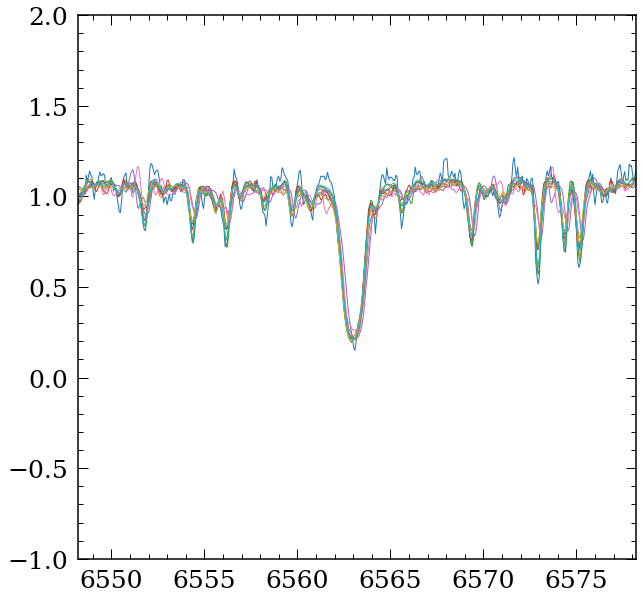

In [83]:
# check if lines are overlapping
for i in range(10):
    plt.plot(wl_all,tr_flux[i,:],linewidth=1)
plt.xlim([6563.2-15,6563.2+15])
plt.ylim([-1,2])

In [84]:
# get training labels from APOGEE
# get the dataframe for labels
labels=galah_apogee.loc[pd.DataFrame(spec).dropna().index]

cannonage=pd.read_pickle('../SecondYear/CannonDR16.pkl')
labels=labels.merge(cannonage[['APOGEE_ID','Age','DP','Dnu']], left_on='APOGEE_ID',right_on='APOGEE_ID',how="inner")


labelnames=['M_H','TEFF','LOGG','MG_FE','DP','Dnu','Age']

tr_label=labels[labelnames].values


In [85]:
print(tr_ID.shape)
print(wl_all.shape)
print(tr_flux.shape)
print(tr_ivar.shape)
print(tr_label.shape)


(745,)
(16384,)
(745, 16384)
(745, 16384)
(745, 7)


In [86]:
def calc_SNR(flux, ivar):
        """ Calculate the SNR of a spectrum, ignoring bad pixels

        Parameters
        ----------
        flux: numpy ndarray
            pixel intensities
        ivar: numpy ndarray
            inverse variances corresponding to flux

        Returns
        -------
        SNR: float
        """
        take = ivar > 0
        SNR = float(np.median(flux*(ivar**0.5)))
        return SNR  
    

(array([ 51., 116., 153., 135.,  74.,  54.,  34.,  31.,  26.,  15.,  15.,
          7.,   5.,   5.,   8.,   3.,   3.,   3.,   0.,   1.,   1.,   1.,
          0.,   1.,   0.,   1.,   2.]),
 array([  4.9580112 ,  16.04333293,  27.12865466,  38.21397639,
         49.29929812,  60.38461985,  71.46994158,  82.55526331,
         93.64058504, 104.72590677, 115.8112285 , 126.89655023,
        137.98187196, 149.06719369, 160.15251542, 171.23783715,
        182.32315888, 193.40848061, 204.49380234, 215.57912407,
        226.6644458 , 237.74976753, 248.83508926, 259.92041099,
        271.00573272, 282.09105446, 293.17637619, 304.26169792]),
 <BarContainer object of 27 artists>)

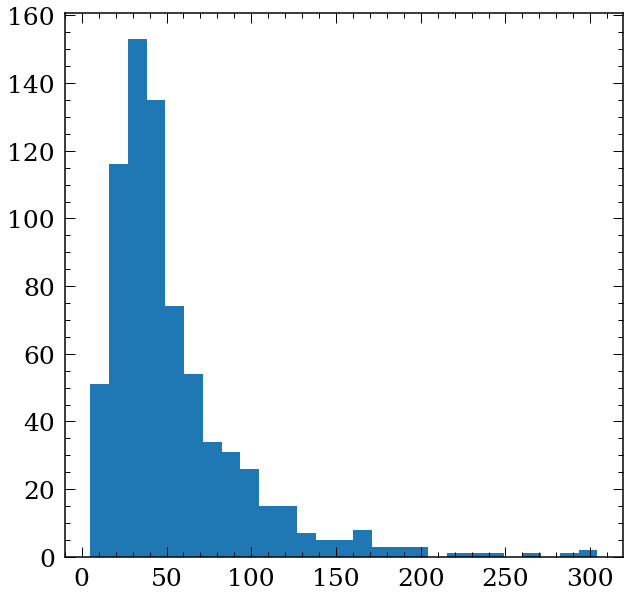

In [87]:
snrs=np.zeros(len(tr_ID))
for i in range(len(tr_ID)):
    snrs[i]=calc_SNR(tr_flux[i,:], tr_ivar[i,:])
plt.hist(snrs,bins=int(np.sqrt(len(tr_ID))))
    

(728,)
(16384,)
(728, 16384)
(728, 16384)
(728, 7)


(array([ 54., 124., 165., 127.,  74.,  49.,  37.,  28.,  22.,  14.,  12.,
          8.,   5.,   8.,   4.,   3.,   4.,   0.,   1.,   1.,   1.,   0.,
          1.,   0.,   1.,   2.]),
 array([  4.9580112 ,  16.46969145,  27.98137171,  39.49305197,
         51.00473223,  62.51641249,  74.02809275,  85.539773  ,
         97.05145326, 108.56313352, 120.07481378, 131.58649404,
        143.0981743 , 154.60985456, 166.12153481, 177.63321507,
        189.14489533, 200.65657559, 212.16825585, 223.67993611,
        235.19161637, 246.70329662, 258.21497688, 269.72665714,
        281.2383374 , 292.75001766, 304.26169792]),
 <BarContainer object of 26 artists>)

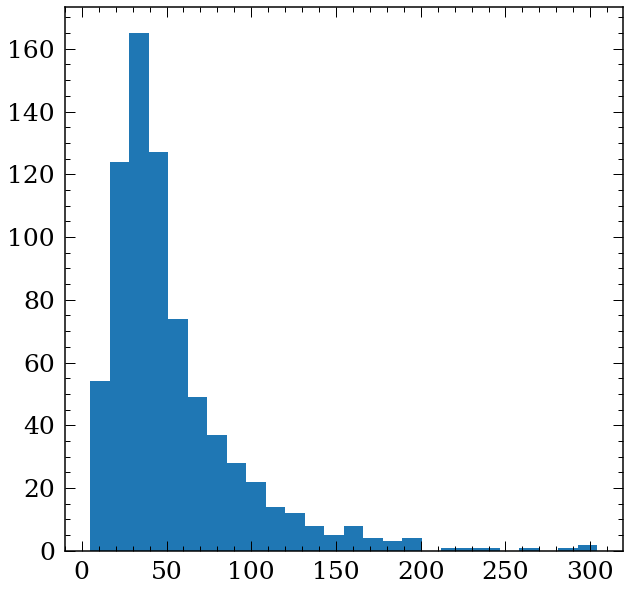

In [88]:
# get ride of low SNR stars
snrs=np.zeros(len(tr_ID))
for i in range(len(tr_ID)):
    snrs[i]=calc_SNR(tr_flux[i,:], tr_ivar[i,:])
m=snrs>10
tr_ID,tr_flux,tr_ivar,tr_label=tr_ID[m],tr_flux[m,:],tr_ivar[m,:],tr_label[m,:]

print(tr_ID.shape)
print(wl_all.shape)
print(tr_flux.shape)
print(tr_ivar.shape)
print(tr_label.shape)

plt.hist(snrs,bins=int(np.sqrt(len(tr_ID))))

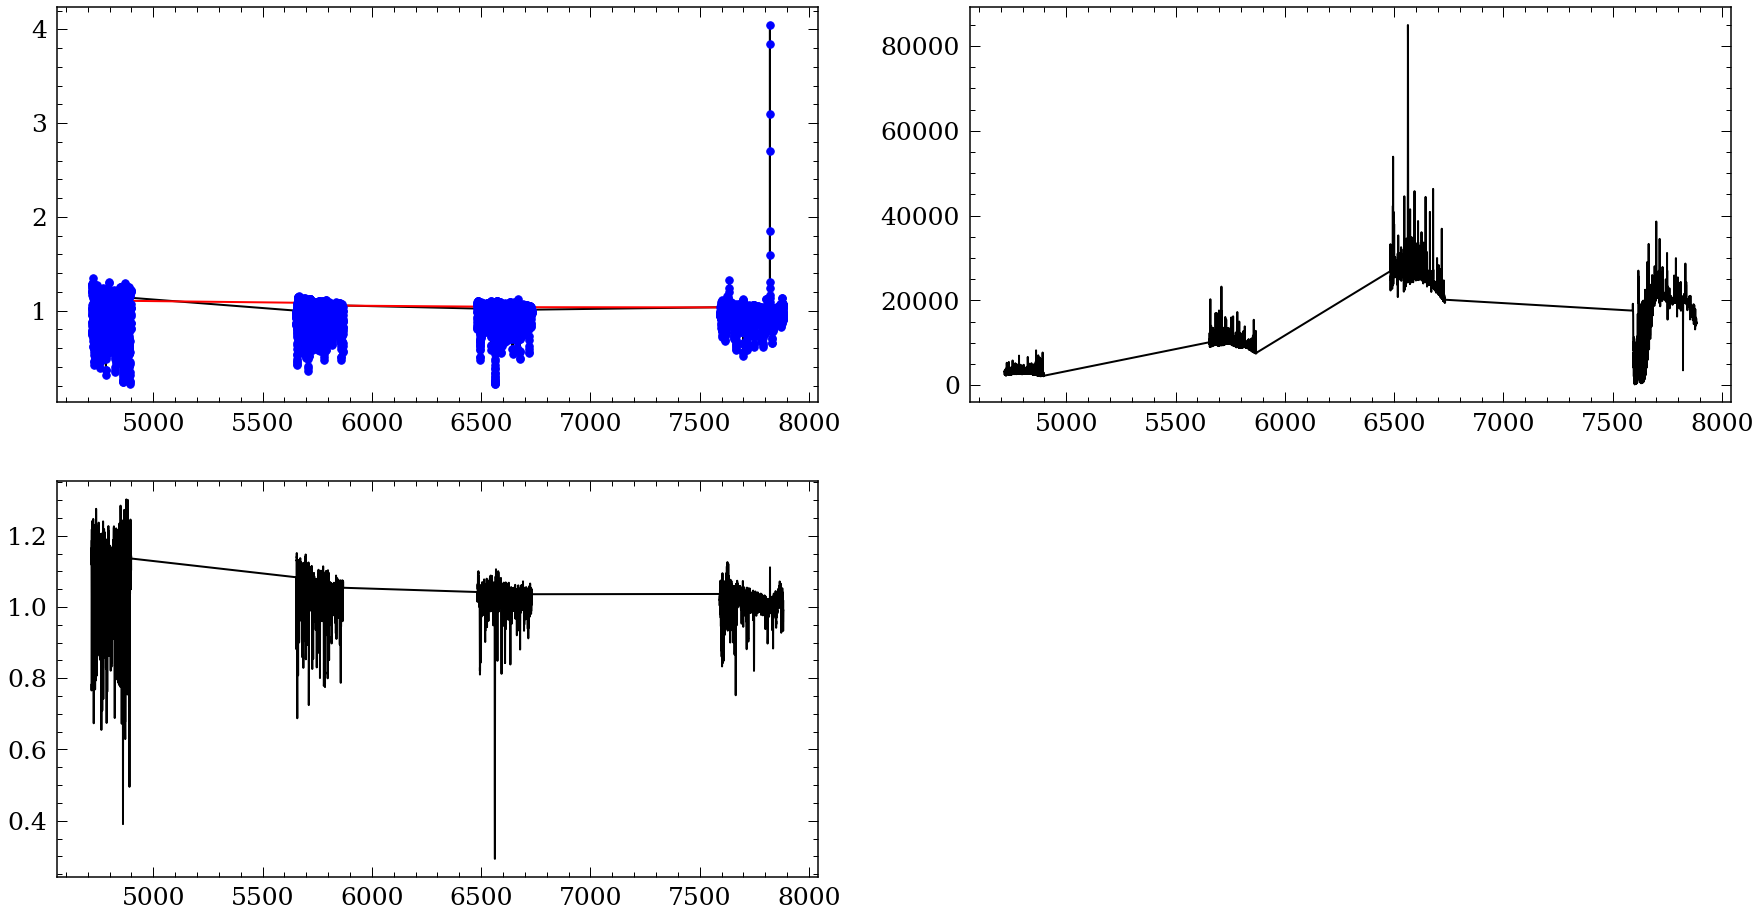

In [89]:
pltnumb=0
softenp=20
# plot one spectra
plt.figure(figsize=(30,16))
plt.subplot(2,2,1)
plt.plot(wl_all,tr_flux[pltnumb,:],'k-')
flux_errs=np.sqrt(1/tr_ivar[pltnumb,:])*tr_flux[pltnumb,:]
normflux,outs=get_outliers(tr_flux[pltnumb,:], flux_errs, softenp=softenp, f=3)
plt.plot(wl_all,normflux,'r-')
plt.plot(wl_all[outs],tr_flux[pltnumb,:][outs],'b.',markersize=15)
#plt.xlim([7820,7830])

plt.subplot(2,2,2)
plt.plot(wl_all,tr_ivar[pltnumb,:],'k-')


plt.subplot(2,2,3)
newflux, fewivar=replace_outliers(tr_flux[pltnumb,:], tr_ivar[pltnumb,:], softenp=softenp, f=3)
plt.plot(wl_all,newflux,'k-')



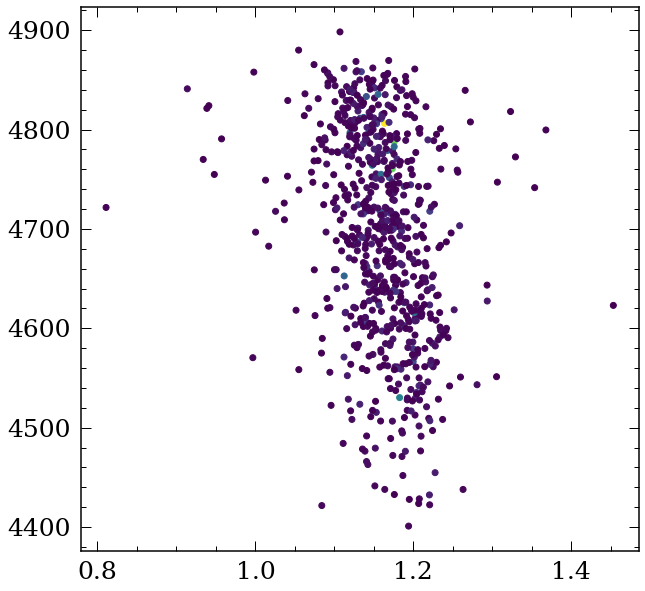

In [90]:
plt.scatter(tr_flux[:,1000],tr_label[:,1],c=tr_ivar[:,1000])


In [91]:
test_ID = tr_ID
test_flux = tr_flux
test_ivar = tr_ivar


In [92]:
from TheCannon import dataset
ds = dataset.Dataset(wl_all, tr_ID, tr_flux, tr_ivar, 
                     tr_label, test_ID, test_flux, test_ivar)

Loading dataset
This may take a while...


In [93]:
ds.set_label_names(labelnames)

Diagnostic for SNRs of reference and survey objects


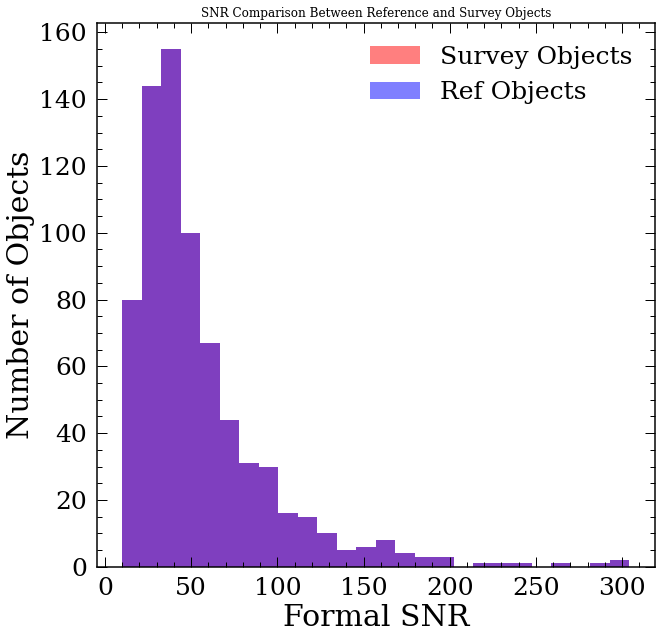

In [94]:
fig = ds.diagnostics_SNR()

In [95]:
from TheCannon import model
md = model.CannonModel(2, useErrors=False)
md.fit(ds)



Done training model. 


In [96]:

md.diagnostics_plot_chisq(ds)


Diagnostic plot: histogram of the red chi squareds of the fit
Saved as modelfit_chisqs.png


In [97]:
label_errs = md.infer_labels(ds)
test_labels = ds.test_label_vals



Inferring Labels


Diagnostic plot: leading coeffs and scatters across wavelength.


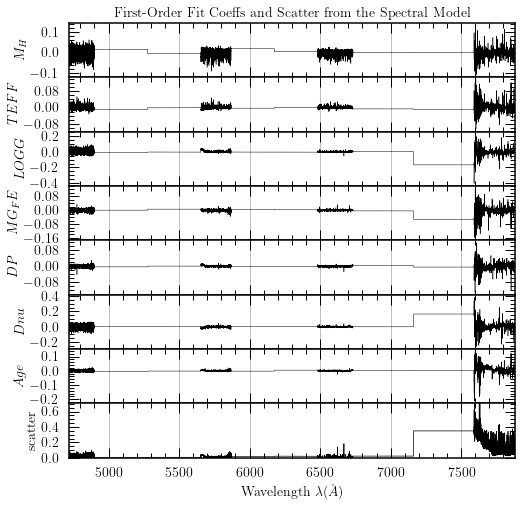

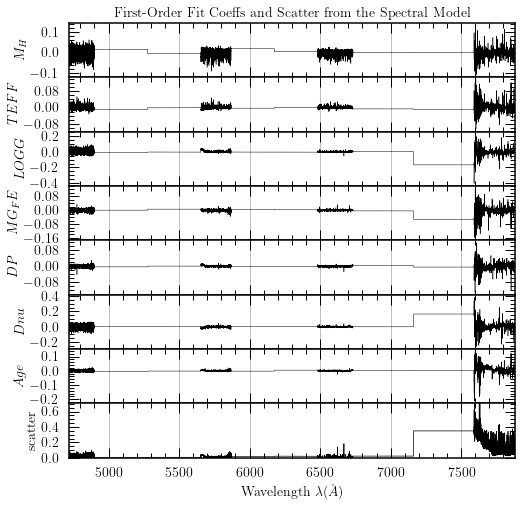

In [98]:
md.diagnostics_leading_coeffs(ds)



In [99]:
import matplotlib.gridspec as gridspec

def diagnostics_1to1_self(df, figname="1to1_label"):
        """ Plots survey labels vs. training labels, color-coded by survey SNR """
        snr = df.test_SNR
        label_names = df.get_plotting_labels()
        nlabels = len(label_names)
        reference_labels = df.tr_label
        test_labels = df.test_label_vals
        
        m=test_labels[:,0]>-100
        reference_labels=reference_labels[m,:]
        test_labels=test_labels[m,:]
        snr=snr[m]

        for i in range(nlabels):
            name = label_names[i]
            orig = reference_labels[:,i]
            cannon = test_labels[:,i]
            # calculate bias and scatter
            scatter = np.round(np.std(orig-cannon),5)
            bias  = np.round(np.mean(orig-cannon),5)

            low = np.minimum(min(orig), min(cannon))
            high = np.maximum(max(orig), max(cannon))

            fig = plt.figure(figsize=(10,6))
            gs = gridspec.GridSpec(1,2,width_ratios=[2,1], wspace=0.3)
            ax1 = plt.subplot(gs[0])
            ax2 = plt.subplot(gs[1])
            ax1.plot([low, high], [low, high], 'k-', linewidth=2.0, label="x=y")
            ax1.set_xlim(low, high)
            ax1.set_ylim(low, high)
            ax1.legend(fontsize=14, loc='lower right')
            pl = ax1.scatter(orig, cannon, marker='x', c=snr,
                    vmin=50, vmax=200, alpha=0.7)
            cb = plt.colorbar(pl, ax=ax1, orientation='horizontal')
            cb.set_label('SNR from Test Set', fontsize=12)
            textstr = 'Scatter: %s \nBias: %s' %(scatter, bias)
            ax1.text(0.05, 0.95, textstr, transform=ax1.transAxes,
                    fontsize=14, verticalalignment='top')
            ax1.tick_params(axis='x', labelsize=14)
            ax1.tick_params(axis='y', labelsize=14)
            ax1.set_xlabel("Reference Value", fontsize=14)
            ax1.set_ylabel("Cannon Test Value", fontsize=14)
            ax1.set_title("1-1 Plot of Label " + r"$%s$" % name)
            diff = cannon-orig
            npoints = len(diff)
            mu = np.mean(diff)
            sig = np.std(diff)
            #ax2.hist(diff, orientation='horizontal')
            ax2.hist(diff, range=[-3*sig,3*sig], color='k', bins=int(np.sqrt(npoints)),
                    orientation='horizontal', alpha=0.3, histtype='stepfilled')
            ax2.tick_params(axis='x', labelsize=14)
            ax2.tick_params(axis='y', labelsize=14)
            ax2.set_xlabel("Count", fontsize=14)
            ax2.set_ylabel("Difference", fontsize=14)
            ax2.axhline(y=0, c='k', lw=3, label='Difference=0')
            ax2.set_title("Training Versus Test Labels for $%s$" %name,
                    fontsize=14)
            ax2.legend(fontsize=14)
            print("Diagnostic for label output vs. input")
            plt.show()

Diagnostic for label output vs. input


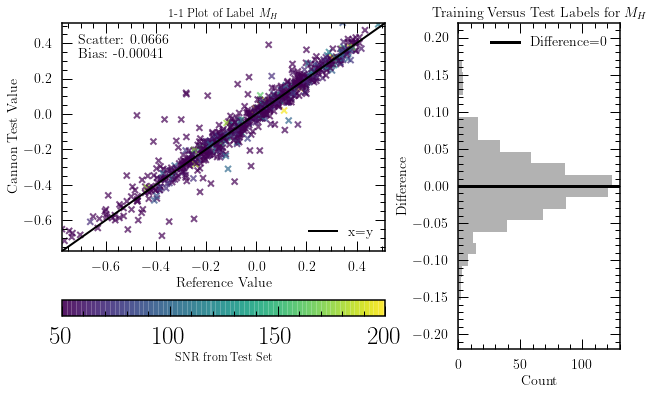

Diagnostic for label output vs. input


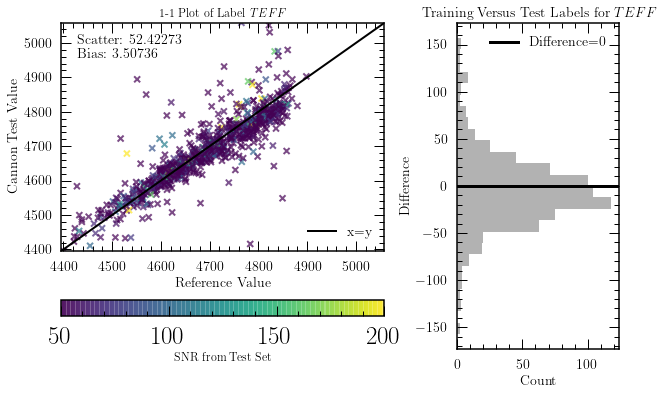

Diagnostic for label output vs. input


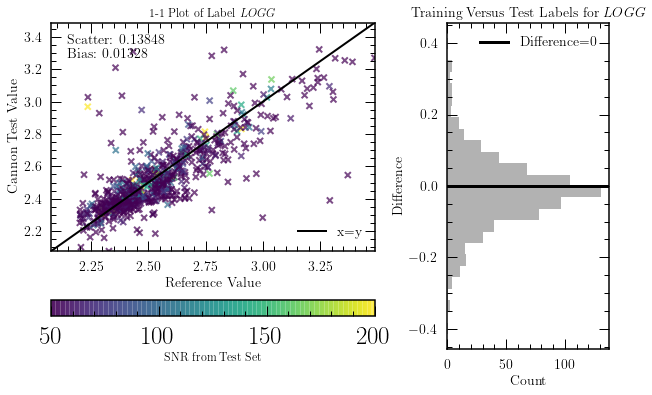

Diagnostic for label output vs. input


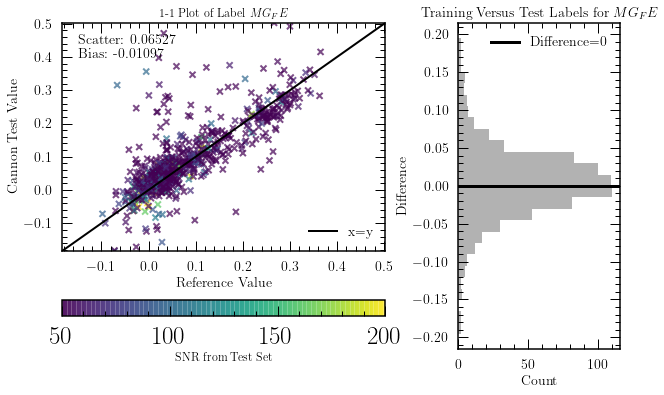

Diagnostic for label output vs. input


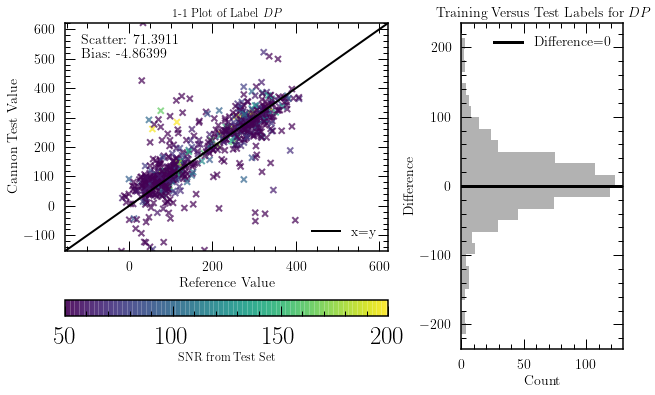

Diagnostic for label output vs. input


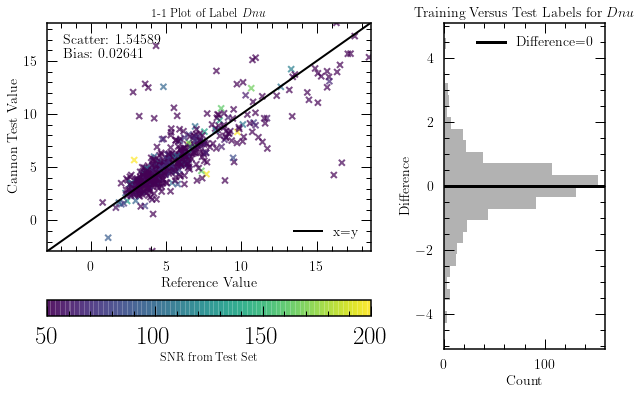

Diagnostic for label output vs. input


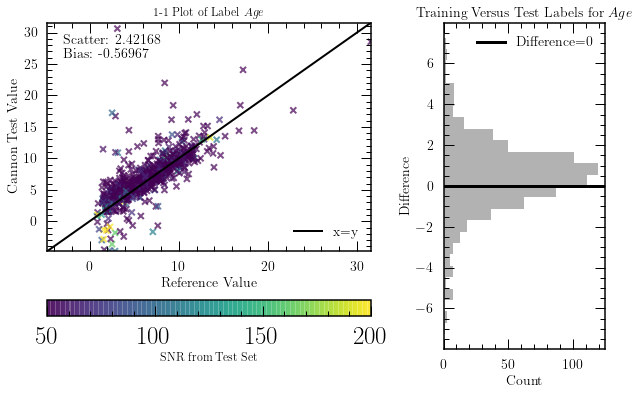

In [100]:
# first cleanup, getting rid of outlisers
diagnostics_1to1_self(ds)

5654.140419225993 5868.885799619573
5654.140419225993 5868.885799619573
5654.140419225993 5868.885799619573
5654.140419225993 5868.885799619573
5654.140419225993 5868.885799619573
5654.140419225993 5868.885799619573
5654.140419225993 5868.885799619573


Text(0, 0.5, 'scatter')

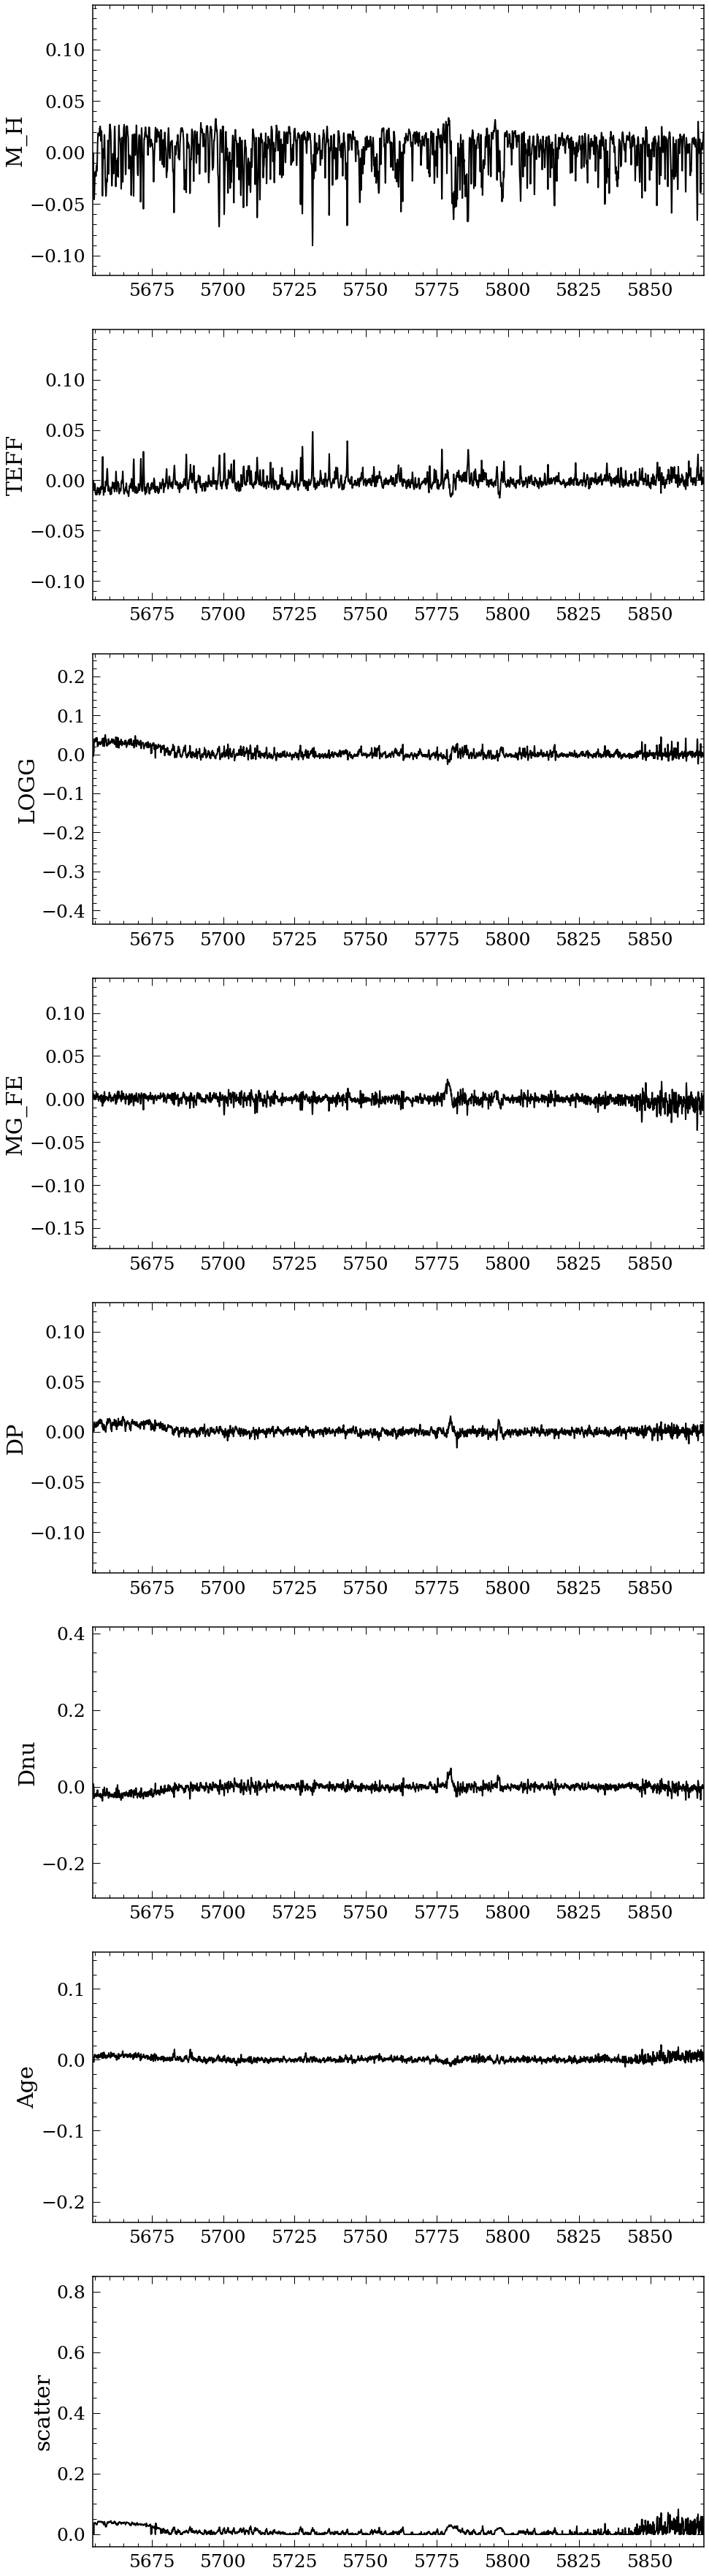

In [101]:
plt.rcParams.keys()
plt.rc('font', family='serif')
params = {'text.usetex': False}
plt.rcParams.update(params)

rangecheck=2

labels_pltt=ds.get_plotting_labels()
plt.figure(figsize=(15,64))
coefs=md.coeffs
for i in range(7):
    coef=coefs[:,i+1]
    plt.subplot(8,1,i+1)
    for j in range(4):
        wlsing=wl_all[4096*j:4096*(j+1)]
        coef_wl=coef[4096*j:4096*(j+1)]
        plt.plot(wlsing,coef_wl,'k-')
        if j+1==rangecheck:
            minwl=min(wlsing)
            maxwl=max(wlsing)
            print(minwl,maxwl)
            plt.xlim([min(wlsing),max(wlsing)])
            
    plt.ylabel(labels_pltt[i])
    
plt.subplot(8,1,8)
plt.plot(wl_all,md.scatters,'k-')
plt.xlim([minwl,maxwl])
plt.ylabel('scatter')

16384


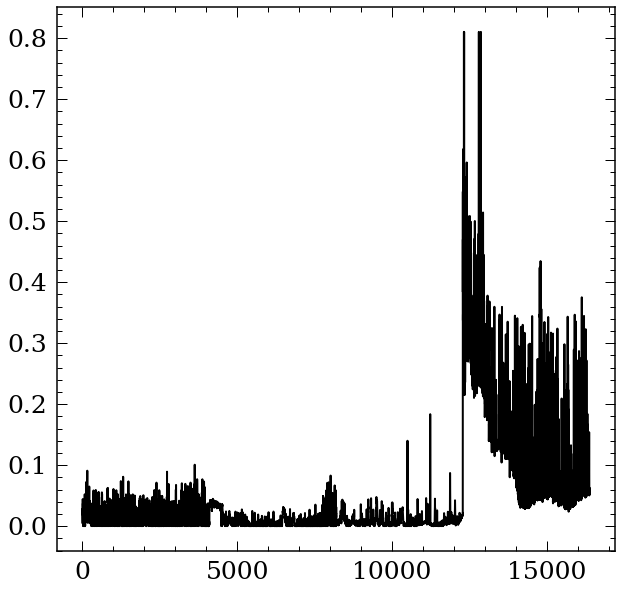

In [102]:
plt.plot(md.scatters,'k-')
print(len(md.scatters))

In [103]:
linlist=pd.read_table('Data/linetable',delimiter=',',skiprows=1)
linlist['wl1']=(linlist['starting wl']>min(wl_all[:4096]))&(linlist['endingwl']<max(wl_all[:4096]))
linlist['wl2']=(linlist['starting wl']>(min(wl_all[4096:4096*2])))&(linlist['endingwl']<max(wl_all[4096:4096*2]))
linlist['wl3']=(linlist['starting wl']>min(wl_all[4096*2:4096*3]))&(linlist['endingwl']<max(wl_all[4096*2:4096*3]))
linlist['wl4']=(linlist['starting wl']>max(wl_all[4096*2:4096*3]))
linlist['width']=linlist['endingwl']-linlist['starting wl']
linlist

element  starting wl  endingwl    wl1    wl2    wl3    wl4  width
0        Al      6695.78   6696.17  False  False   True  False   0.39
1        Al      6698.41   6698.92  False  False   True  False   0.51
2        Al      7834.95   7835.47  False  False  False   True   0.52
3        Al      7835.84   7836.43  False  False  False   True   0.59
4        Ba      5853.53   5853.86  False   True  False  False   0.33
..      ...          ...       ...    ...    ...    ...    ...    ...
104       Y      4883.54   4883.82   True  False  False  False   0.28
105       Y      5662.74   5663.18  False   True  False  False   0.44
106       Y      5728.74   5729.01  False   True  False  False   0.27
107      Zn      4721.99   4722.27   True  False  False  False   0.28
108      Zn      4810.36   4810.63   True  False  False  False   0.27

[109 rows x 8 columns]

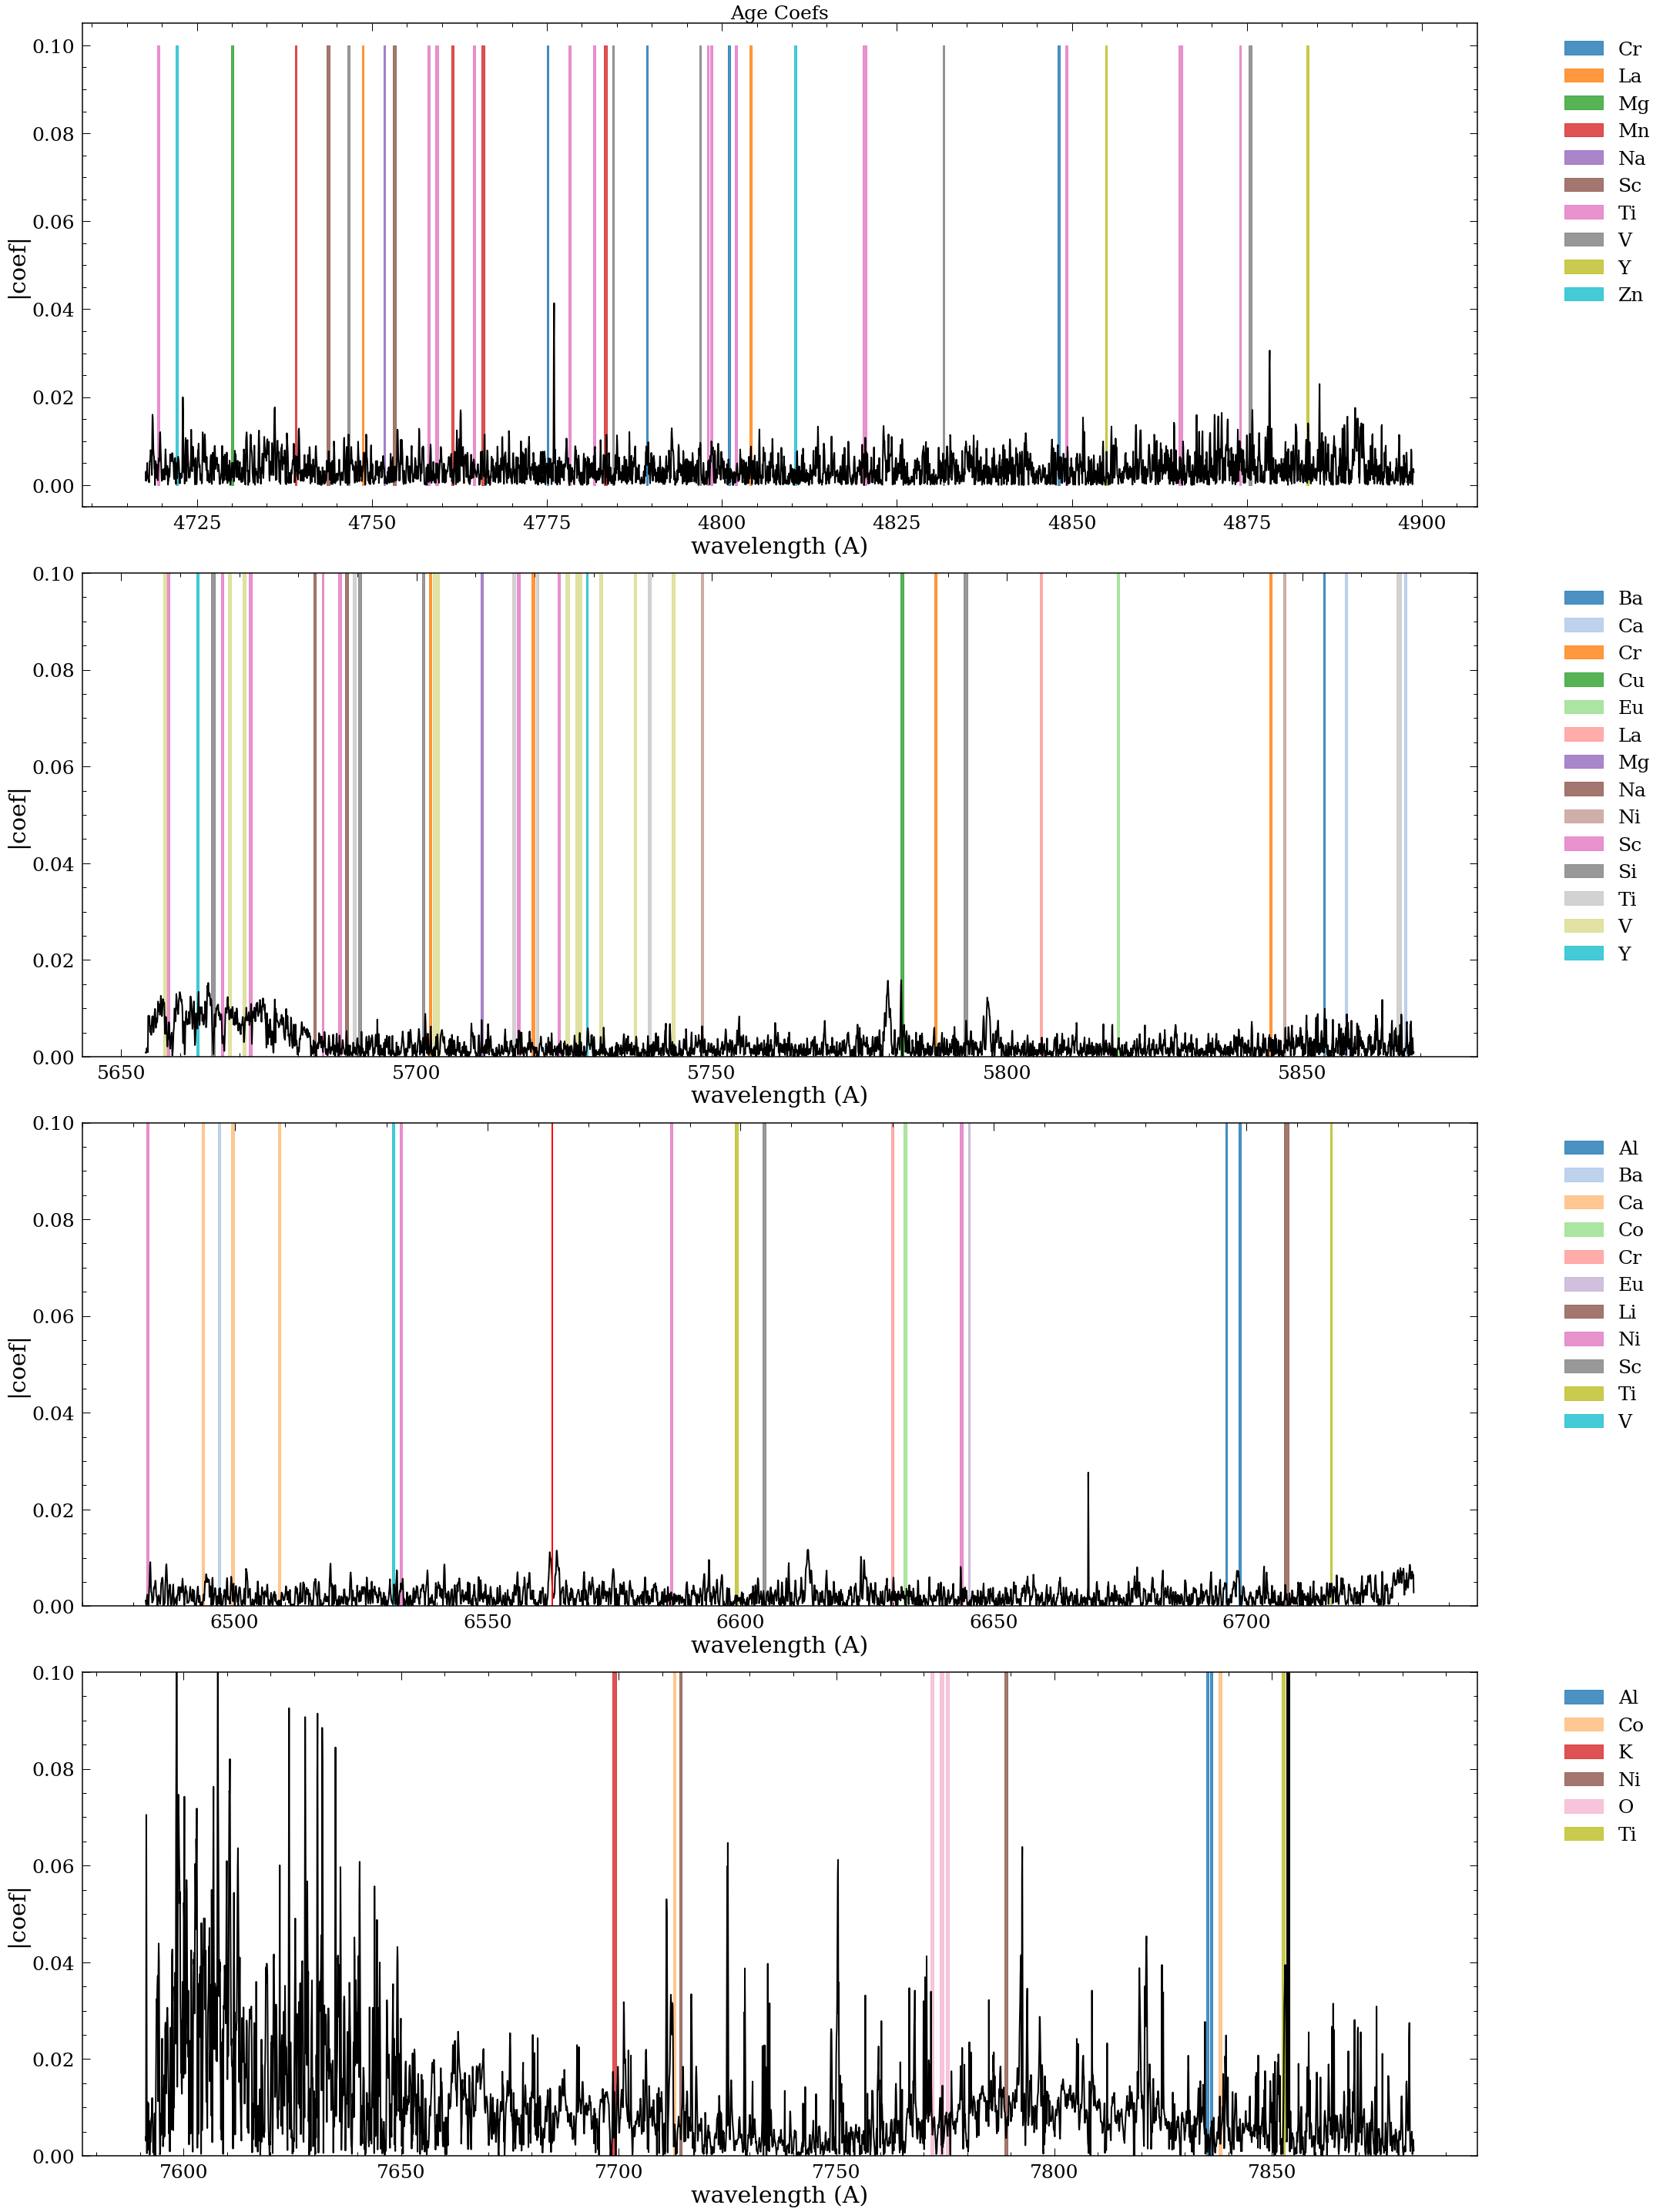

In [104]:
import matplotlib.patches as mpatches
import random

linnumb=5

plt.figure(figsize=(30,40))
plt.subplot(4,1,1)
plt.plot(wl_all[:4096],abs(coefs[:,linnumb][:4096]),'k-')
linwl1=linlist.loc[linlist['wl1']==1].reset_index(drop=True)
elemts=linwl1.element.unique()
for i in range(len(elemts)):
    linwl1_ele=linwl1.loc[linwl1['element']==elemts[i]].reset_index(drop=True)
    colorele=plt.cm.tab20(i/len(elemts))
    for j in range(len(linwl1_ele)):
        if j==0:
            rect=mpatches.Rectangle([linwl1_ele['starting wl'].iloc[j],0],linwl1_ele['width'].iloc[j],0.1,
                               alpha=0.8,color=colorele,label=elemts[i])
        else:
            rect=mpatches.Rectangle([linwl1_ele['starting wl'].iloc[j],0],linwl1_ele['width'].iloc[j],0.1,
                               alpha=0.8,color=colorele)
        plt.gca().add_patch(rect)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.ylabel('|coef|')
plt.xlabel('wavelength (A)')
plt.title('Age Coefs',fontsize=25)
#plt.ylim([0,0.1])
#plt.xlim([5680,5690])

plt.subplot(4,1,2)
linwl1=linlist.loc[linlist['wl2']==1].reset_index(drop=True)
elemts=linwl1.element.unique()
for i in range(len(elemts)):
    linwl1_ele=linwl1.loc[linwl1['element']==elemts[i]].reset_index(drop=True)
    colorele=plt.cm.tab20(i/len(elemts))
    for j in range(len(linwl1_ele)):
        if j==0:
            rect=mpatches.Rectangle([linwl1_ele['starting wl'].iloc[j],0],linwl1_ele['width'].iloc[j],0.1,
                               alpha=0.8,color=colorele,label=elemts[i])
        else:
            rect=mpatches.Rectangle([linwl1_ele['starting wl'].iloc[j],0],linwl1_ele['width'].iloc[j],0.1,
                               alpha=0.8,color=colorele)
        plt.gca().add_patch(rect)
plt.plot(wl_all[4096:4096*2],abs(coefs[:,linnumb][4096:4096*2]),'k-')
#plt.plot(wl_all[4096:4096*2],abs(coefs[:,5][4096:4096*2]),'k-')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.ylabel('|coef|')
plt.xlabel('wavelength (A)')
plt.ylim([0,0.1])
#plt.xlim([6550,6570])

plt.subplot(4,1,3)
linwl1=linlist.loc[linlist['wl3']==1].reset_index(drop=True)
elemts=linwl1.element.unique()
for i in range(len(elemts)):
    linwl1_ele=linwl1.loc[linwl1['element']==elemts[i]].reset_index(drop=True)
    colorele=plt.cm.tab20(i/len(elemts))
    for j in range(len(linwl1_ele)):
        if j==0:
            rect=mpatches.Rectangle([linwl1_ele['starting wl'].iloc[j],0],linwl1_ele['width'].iloc[j],0.1,
                               alpha=0.8,color=colorele,label=elemts[i])
        else:
            rect=mpatches.Rectangle([linwl1_ele['starting wl'].iloc[j],0],linwl1_ele['width'].iloc[j],0.1,
                               alpha=0.8,color=colorele)
        plt.gca().add_patch(rect)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.plot(wl_all[4096*2:4096*3],abs(coefs[:,linnumb][4096*2:4096*3]),'k-')
plt.plot([6562.8,6562.8],[0,1],'r-',linewidth=2,label='H-α')
plt.ylabel('|coef|')
plt.xlabel('wavelength (A)')
plt.ylim([0,0.1])

plt.subplot(4,1,4)
linwl1=linlist.loc[linlist['wl4']==1].reset_index(drop=True)
elemts=linwl1.element.unique()
for i in range(len(elemts)):
    linwl1_ele=linwl1.loc[linwl1['element']==elemts[i]].reset_index(drop=True)
    colorele=plt.cm.tab20(i/len(elemts))
    for j in range(len(linwl1_ele)):
        if j==0:
            rect=mpatches.Rectangle([linwl1_ele['starting wl'].iloc[j],0],linwl1_ele['width'].iloc[j],0.1,
                               alpha=0.8,color=colorele,label=elemts[i])
        else:
            rect=mpatches.Rectangle([linwl1_ele['starting wl'].iloc[j],0],linwl1_ele['width'].iloc[j],0.1,
                               alpha=0.8,color=colorele)
        plt.gca().add_patch(rect)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.plot(wl_all[4096*3:],abs(coefs[:,linnumb][4096*3:]),'k-')
plt.ylabel('|coef|')
plt.xlabel('wavelength (A)')
plt.ylim([0,0.1])

plt.tight_layout()

plt.savefig('agecoef.png')

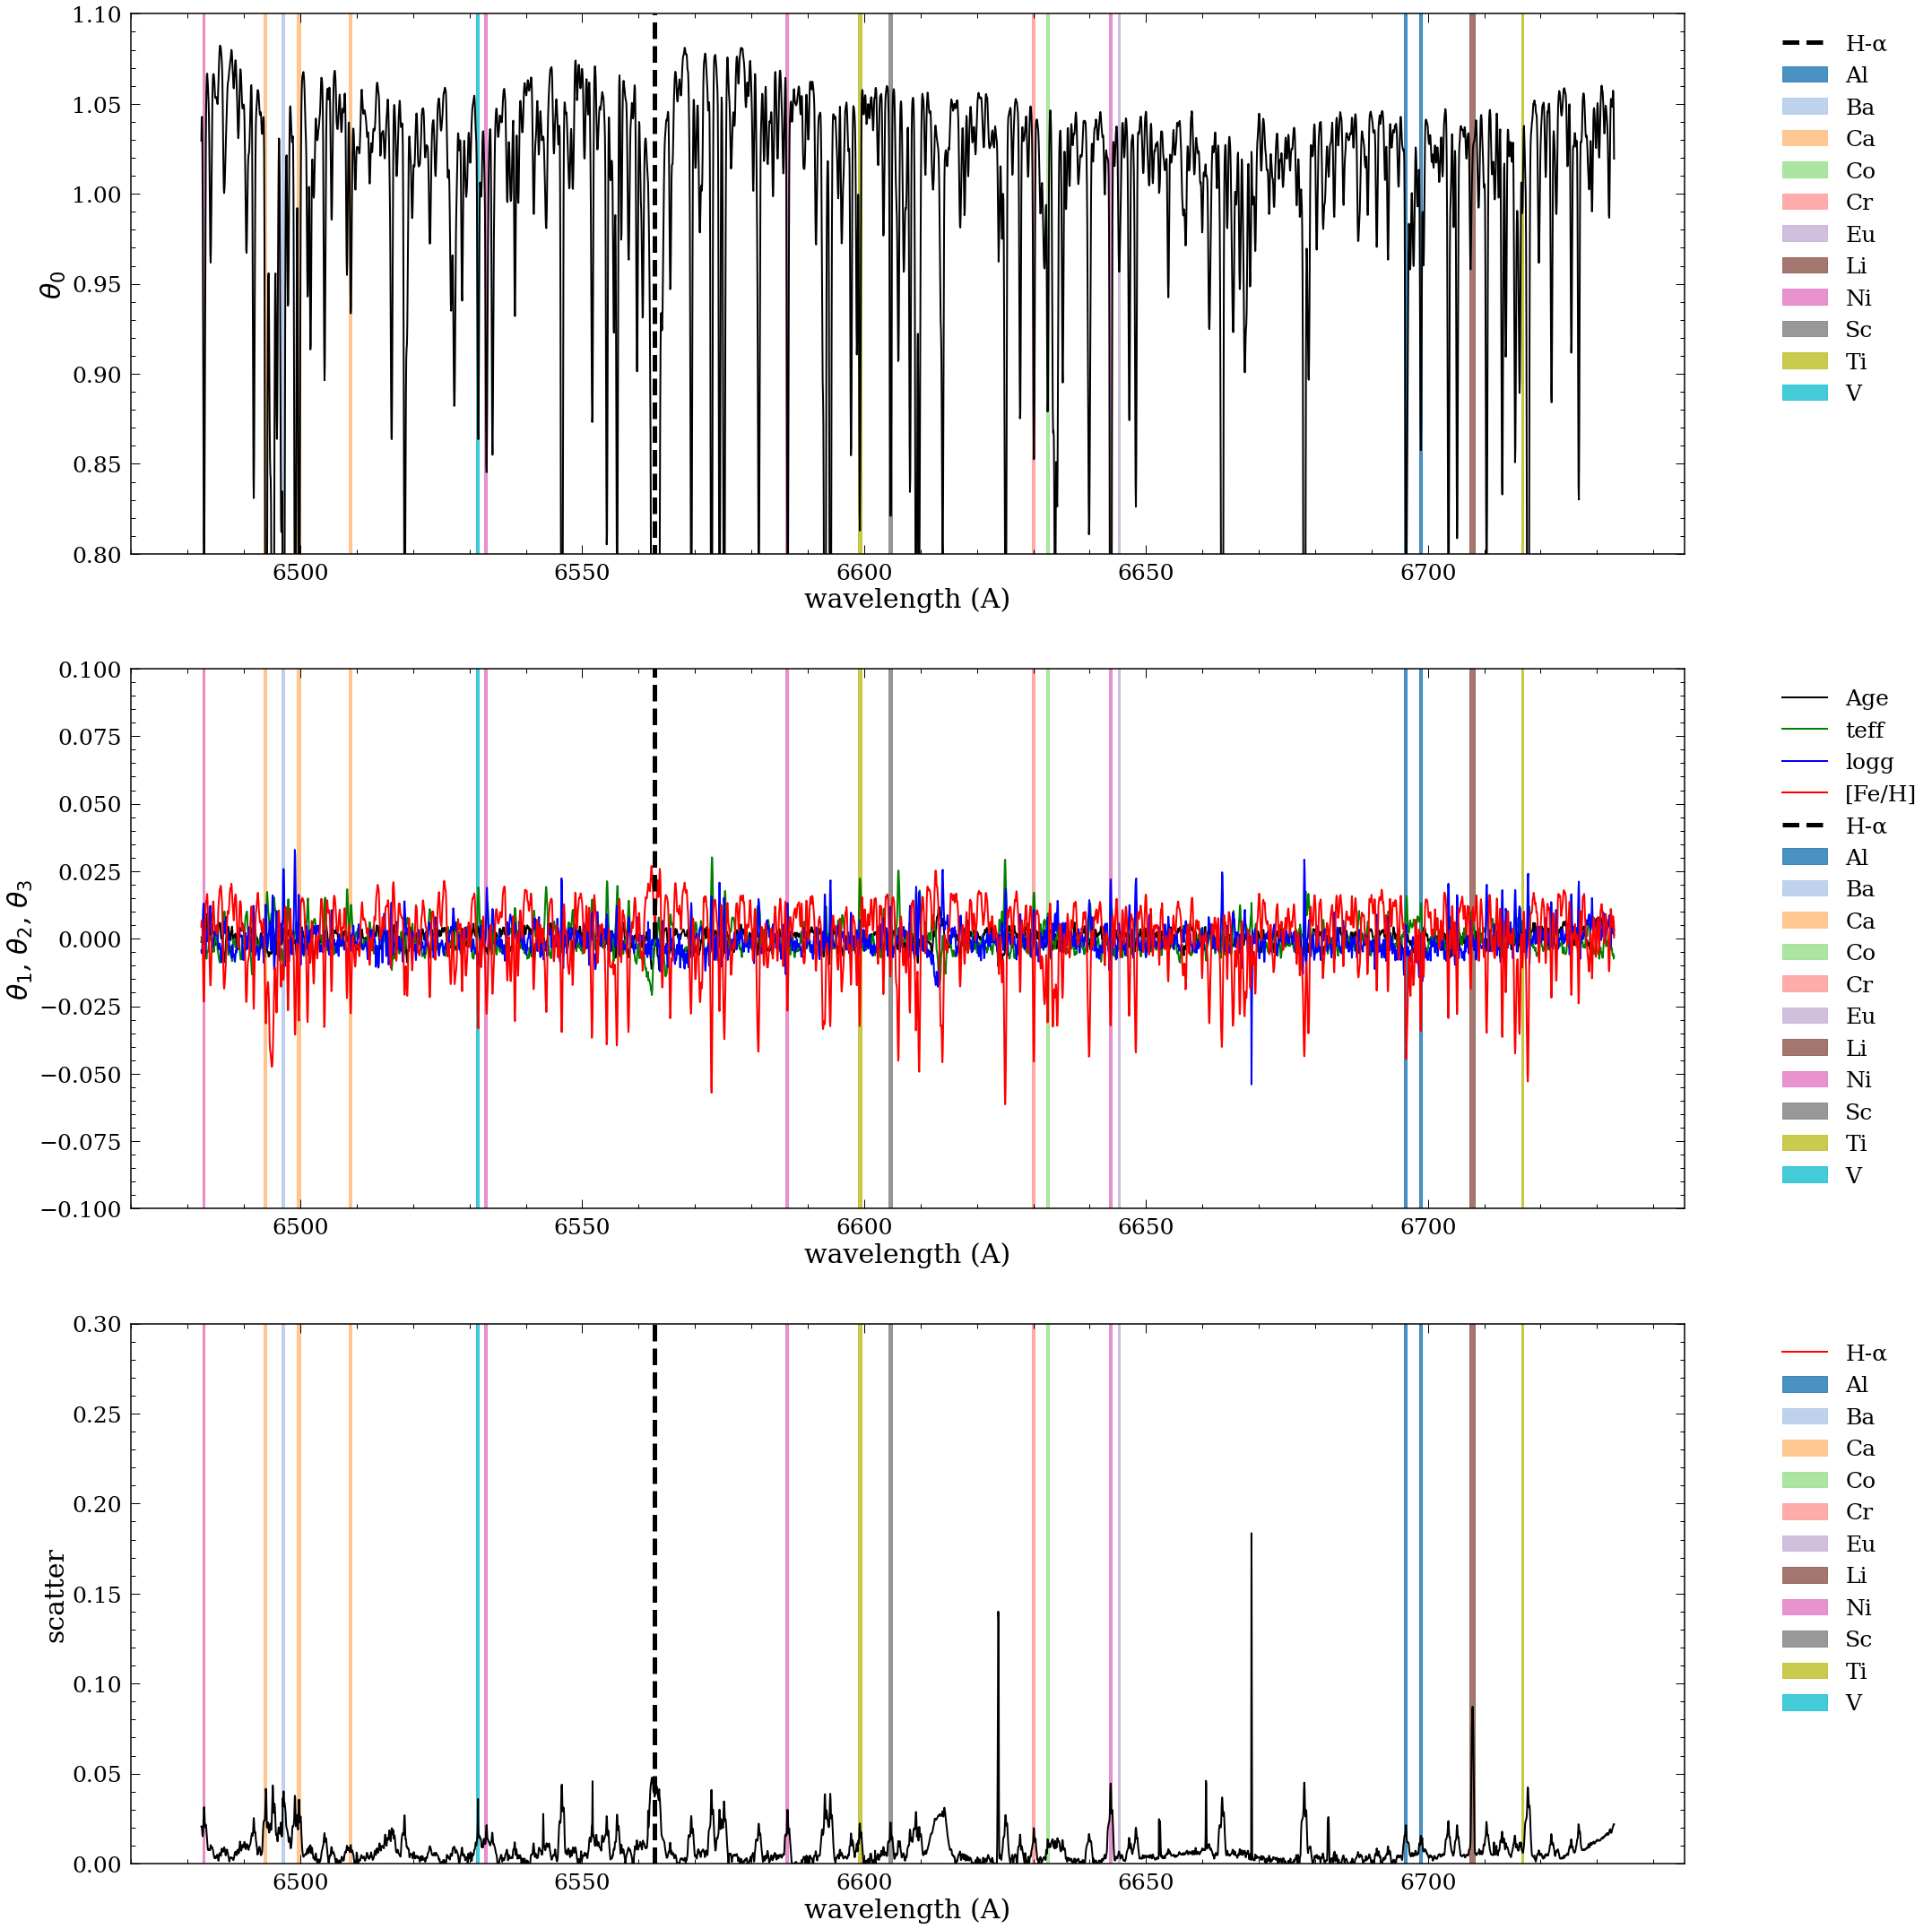

In [105]:
# All coeffs
import matplotlib.patches as mpatches
import random

linnumb=5
wavelenghlim=[6660,6700]
wavelenghlim=[]

plt.figure(figsize=(30,30))
plt.subplot(3,1,1)
plt.plot(wl_all[4096*2:4096*3],abs(coefs[:,0][4096*2:4096*3]),'k-')
linwl1=linlist.loc[linlist['wl3']==1].reset_index(drop=True)
elemts=linwl1.element.unique()
for i in range(len(elemts)):
    linwl1_ele=linwl1.loc[linwl1['element']==elemts[i]].reset_index(drop=True)
    colorele=plt.cm.tab20(i/len(elemts))
    for j in range(len(linwl1_ele)):
        if j==0:
            rect=mpatches.Rectangle([linwl1_ele['starting wl'].iloc[j],0.7],linwl1_ele['width'].iloc[j],0.4,
                               alpha=0.8,color=colorele,label=elemts[i])
        else:
            rect=mpatches.Rectangle([linwl1_ele['starting wl'].iloc[j],0.7],linwl1_ele['width'].iloc[j],0.4,
                               alpha=0.8,color=colorele)
        plt.gca().add_patch(rect)
plt.plot([6562.8,6562.8],[0.4,1.1],'k--',linewidth=5,label='H-α')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.ylabel('$θ_0$')
plt.xlabel('wavelength (A)')
plt.ylim([0.8,1.1])
if len(wavelenghlim)!=0:
    plt.xlim(wavelenghlim)

plt.subplot(3,1,2)
# age
linwl1=linlist.loc[linlist['wl3']==1].reset_index(drop=True)
elemts=linwl1.element.unique()
for i in range(len(elemts)):
    linwl1_ele=linwl1.loc[linwl1['element']==elemts[i]].reset_index(drop=True)
    colorele=plt.cm.tab20(i/len(elemts))
    for j in range(len(linwl1_ele)):
        if j==0:
            rect=mpatches.Rectangle([linwl1_ele['starting wl'].iloc[j],-0.1],linwl1_ele['width'].iloc[j],0.2,
                               alpha=0.8,color=colorele,label=elemts[i])
        else:
            rect=mpatches.Rectangle([linwl1_ele['starting wl'].iloc[j],-0.1],linwl1_ele['width'].iloc[j],0.2,
                               alpha=0.8,color=colorele)
        plt.gca().add_patch(rect)
plt.plot(wl_all[4096*2:4096*3],(coefs[:,linnumb][4096*2:4096*3]),'k-',label='Age')
plt.plot(wl_all[4096*2:4096*3],(coefs[:,2][4096*2:4096*3]),'g-',label='teff')
plt.plot(wl_all[4096*2:4096*3],(coefs[:,3][4096*2:4096*3]),'b-',label='logg')
plt.plot(wl_all[4096*2:4096*3],(coefs[:,1][4096*2:4096*3]),'r-',label='[Fe/H]')
plt.plot([6562.8,6562.8],[0,1],'k--',linewidth=5,label='H-α')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.ylabel('$θ_1$, $θ_2$, $θ_3$')
plt.xlabel('wavelength (A)')
plt.ylim([-0.1,0.1])
if len(wavelenghlim)!=0:
    plt.xlim(wavelenghlim)


plt.subplot(3,1,3)
plt.plot(wl_all[4096*2:4096*3],md.scatters[4096*2:4096*3],'k-')
linwl1=linlist.loc[linlist['wl3']==1].reset_index(drop=True)
elemts=linwl1.element.unique()
for i in range(len(elemts)):
    linwl1_ele=linwl1.loc[linwl1['element']==elemts[i]].reset_index(drop=True)
    colorele=plt.cm.tab20(i/len(elemts))
    for j in range(len(linwl1_ele)):
        if j==0:
            rect=mpatches.Rectangle([linwl1_ele['starting wl'].iloc[j],0],linwl1_ele['width'].iloc[j],0.3,
                               alpha=0.8,color=colorele,label=elemts[i])
        else:
            rect=mpatches.Rectangle([linwl1_ele['starting wl'].iloc[j],0],linwl1_ele['width'].iloc[j],0.3,
                               alpha=0.8,color=colorele)
        plt.gca().add_patch(rect)
plt.plot([6562.8,6562.8],[0.4,1.1],'r-',linewidth=2,label='H-α')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.ylabel('scatter')
plt.xlabel('wavelength (A)')
plt.ylim([0,0.3])
plt.plot([6562.8,6562.8],[0,1],'k--',linewidth=5,label='H-α')
if len(wavelenghlim)!=0:
    plt.xlim(wavelenghlim)
    
plt.tight_layout()
plt.savefig('allwavelength2.png')



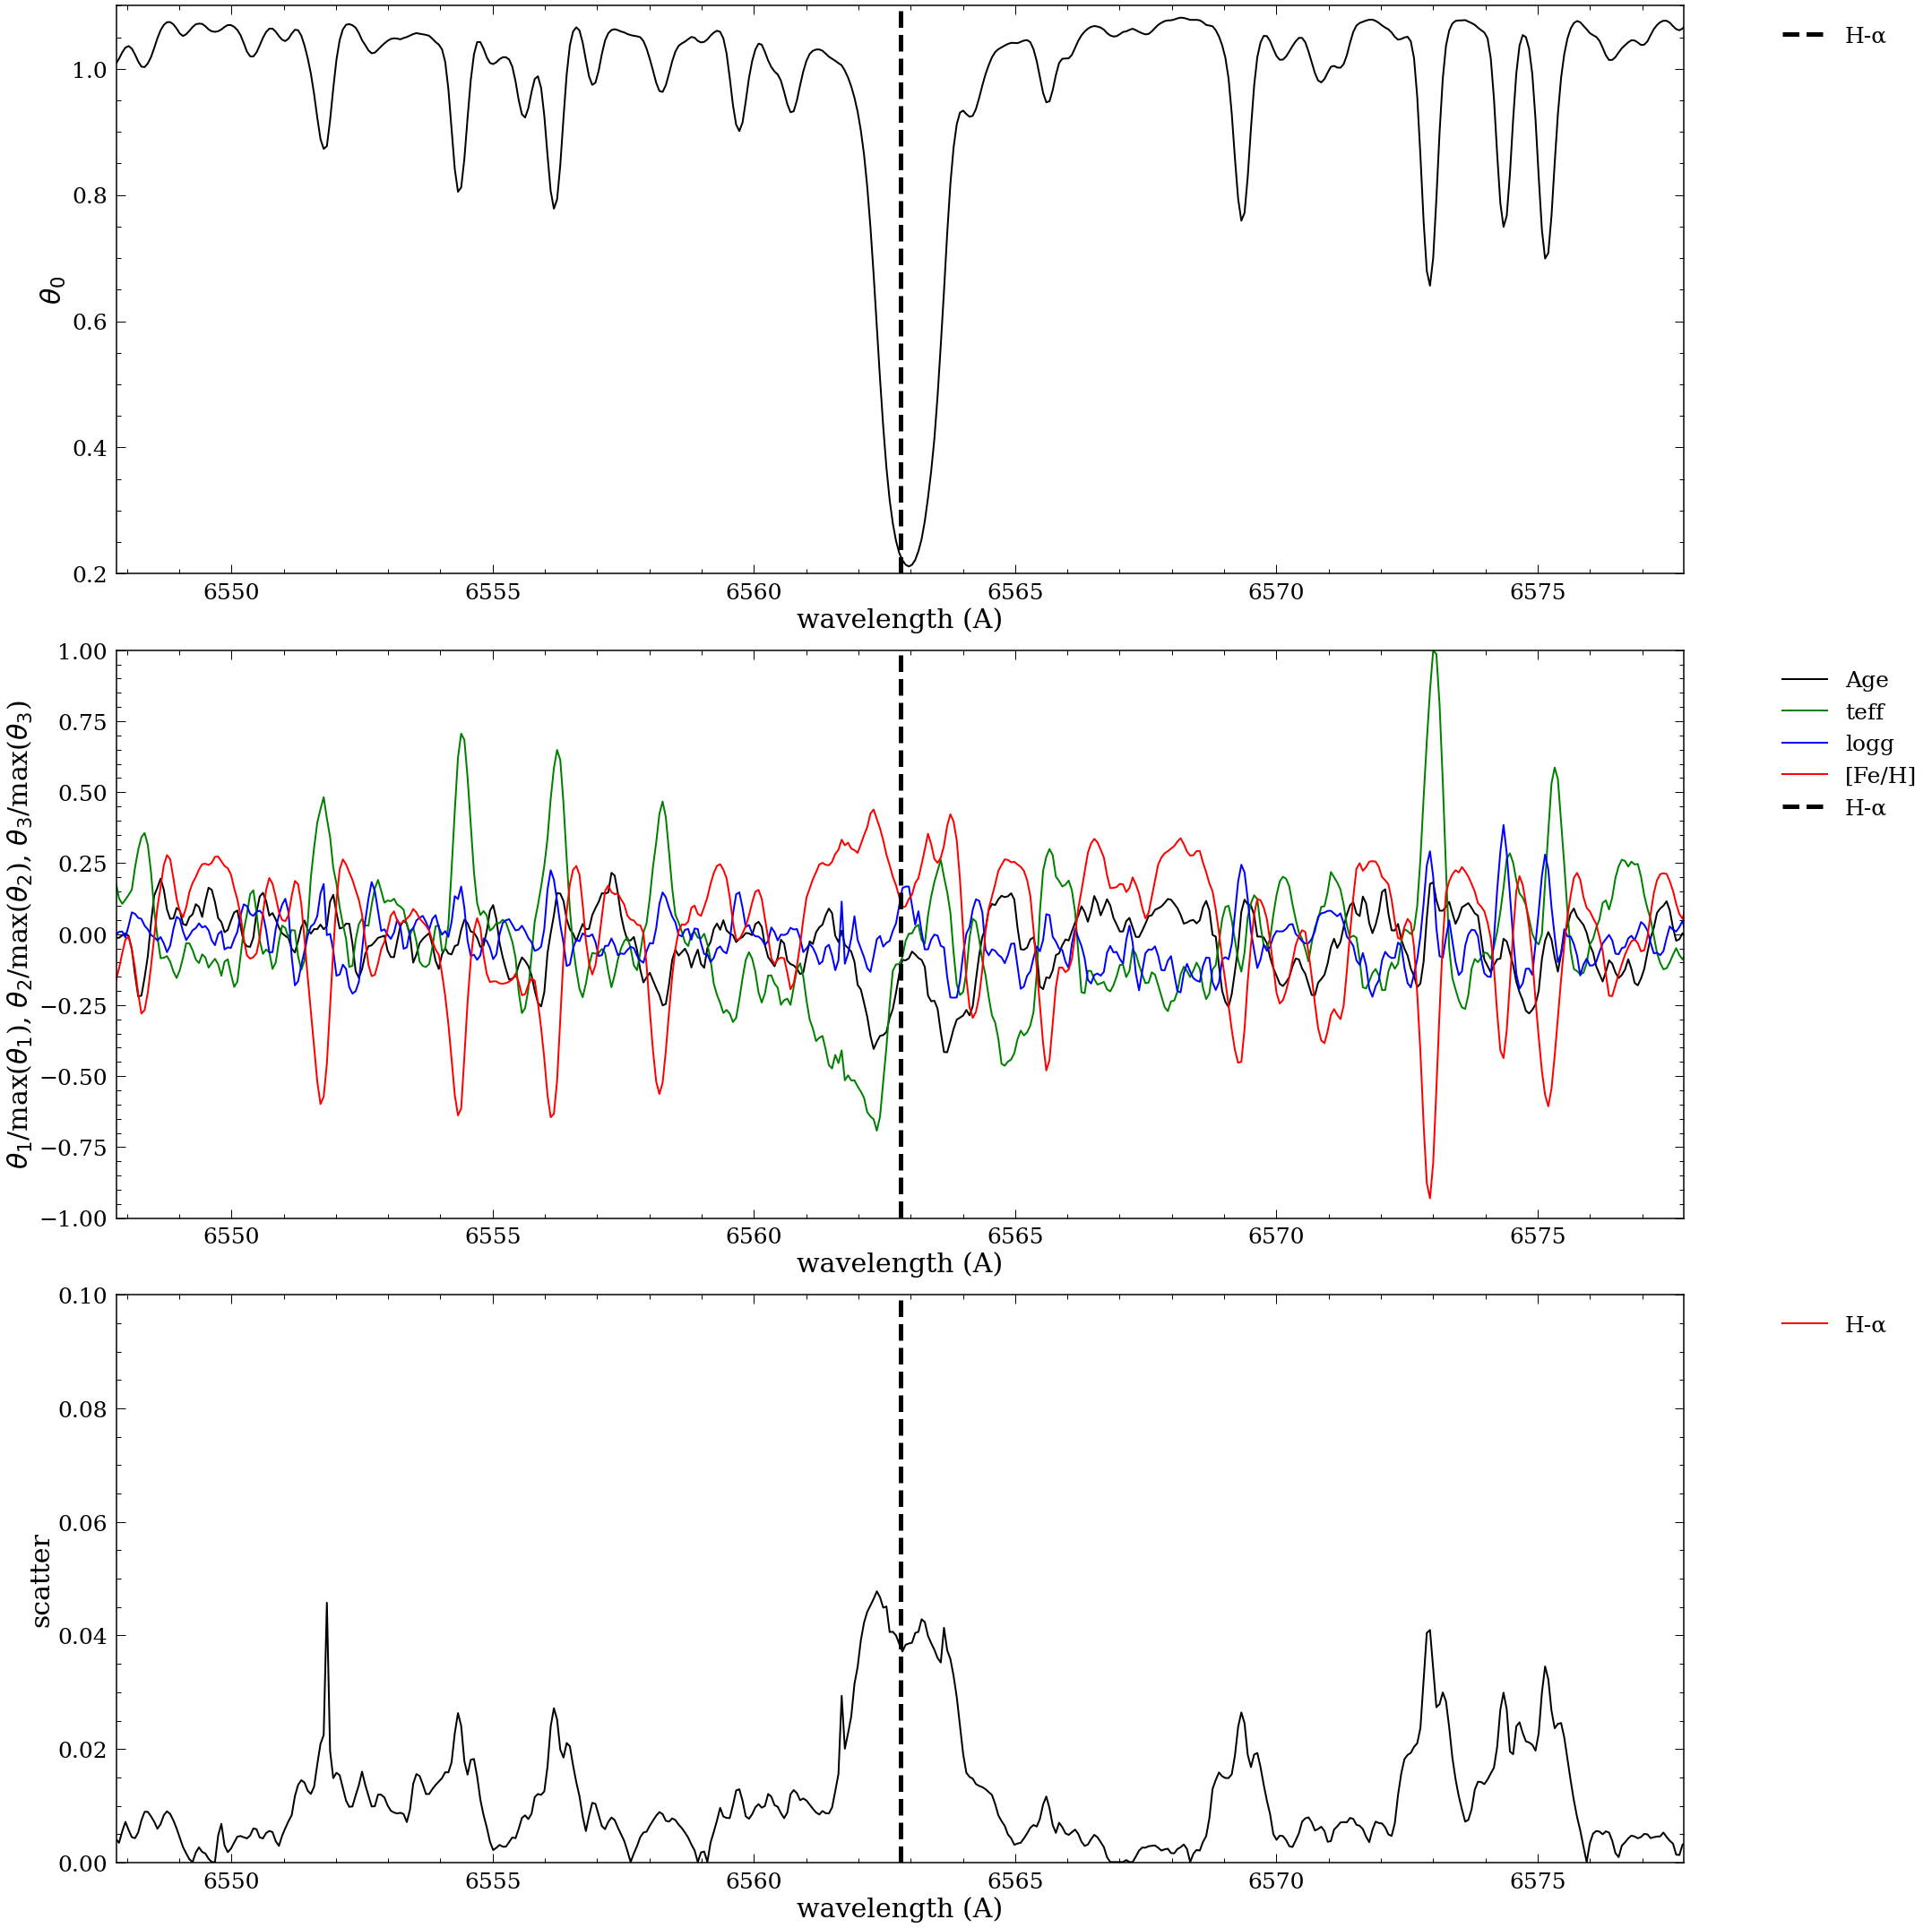

In [106]:
# focus on H-α
import matplotlib.patches as mpatches
import random

linnumb=5
wavelenghlim=[6562.8-15,6562.8+15]
#wavelenghlim=[]

plt.figure(figsize=(30,30))
plt.subplot(3,1,1)
plt.plot(wl_all[4096*2:4096*3],abs(coefs[:,0][4096*2:4096*3]),'k-')
linwl1=linlist.loc[linlist['wl2']==1].reset_index(drop=True)
elemts=linwl1.element.unique()
"""
for i in range(len(elemts)):
    linwl1_ele=linwl1.loc[linwl1['element']==elemts[i]].reset_index(drop=True)
    colorele=plt.cm.tab20(i/len(elemts))
    for j in range(len(linwl1_ele)):
        if j==0:
            rect=mpatches.Rectangle([linwl1_ele['starting wl'].iloc[j],0.7],linwl1_ele['width'].iloc[j],0.4,
                               alpha=0.8,color=colorele,label=elemts[i])
        else:
            rect=mpatches.Rectangle([linwl1_ele['starting wl'].iloc[j],0.7],linwl1_ele['width'].iloc[j],0.4,
                               alpha=0.8,color=colorele)
        plt.gca().add_patch(rect)
"""
plt.plot([6562.8,6562.8],[0.2,1.1],'k--',linewidth=5,label='H-α')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.ylabel('$θ_0$')
plt.xlabel('wavelength (A)')
plt.ylim([0.2,1.1])
if len(wavelenghlim)!=0:
    plt.xlim(wavelenghlim)

plt.subplot(3,1,2)
# age
linwl1=linlist.loc[linlist['wl3']==1].reset_index(drop=True)
elemts=linwl1.element.unique()
"""
for i in range(len(elemts)):
    linwl1_ele=linwl1.loc[linwl1['element']==elemts[i]].reset_index(drop=True)
    colorele=plt.cm.tab20(i/len(elemts))
    for j in range(len(linwl1_ele)):
        if j==0:
            rect=mpatches.Rectangle([linwl1_ele['starting wl'].iloc[j],-0.1],linwl1_ele['width'].iloc[j],0.2,
                               alpha=0.8,color=colorele,label=elemts[i])
        else:
            rect=mpatches.Rectangle([linwl1_ele['starting wl'].iloc[j],-0.1],linwl1_ele['width'].iloc[j],0.2,
                               alpha=0.8,color=colorele)
        plt.gca().add_patch(rect)
"""
plt.plot(wl_all[4096*2:4096*3],(coefs[:,linnumb][4096*2:4096*3]/max(abs(coefs[:,linnumb][4096*2:4096*3]))),'k-',label='Age')
plt.plot(wl_all[4096*2:4096*3],(coefs[:,2][4096*2:4096*3]/max(abs(coefs[:,2][4096*2:4096*3]))),'g-',label='teff')
plt.plot(wl_all[4096*2:4096*3],(coefs[:,3][4096*2:4096*3]/max(abs(coefs[:,3][4096*2:4096*3]))),'b-',label='logg')
plt.plot(wl_all[4096*2:4096*3],(coefs[:,1][4096*2:4096*3]/max(abs(coefs[:,1][4096*2:4096*3]))),'r-',label='[Fe/H]')
plt.plot([6562.8,6562.8],[-2,2],'k--',linewidth=5,label='H-α')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.ylabel('$θ_1$/max($θ_1$), $θ_2$/max($θ_2$), $θ_3$/max($θ_3$)')
plt.xlabel('wavelength (A)')
plt.ylim([-1,1])
if len(wavelenghlim)!=0:
    plt.xlim(wavelenghlim)


plt.subplot(3,1,3)
plt.plot(wl_all[4096*2:4096*3],md.scatters[4096*2:4096*3],'k-')
linwl1=linlist.loc[linlist['wl2']==1].reset_index(drop=True)
elemts=linwl1.element.unique()
"""
for i in range(len(elemts)):
    linwl1_ele=linwl1.loc[linwl1['element']==elemts[i]].reset_index(drop=True)
    colorele=plt.cm.tab20(i/len(elemts))
    for j in range(len(linwl1_ele)):
        if j==0:
            rect=mpatches.Rectangle([linwl1_ele['starting wl'].iloc[j],0],linwl1_ele['width'].iloc[j],0.3,
                               alpha=0.8,color=colorele,label=elemts[i])
        else:
            rect=mpatches.Rectangle([linwl1_ele['starting wl'].iloc[j],0],linwl1_ele['width'].iloc[j],0.3,
                               alpha=0.8,color=colorele)
        plt.gca().add_patch(rect)
"""
plt.plot([6562.8,6562.8],[0.4,1.1],'r-',linewidth=2,label='H-α')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.ylabel('scatter')
plt.xlabel('wavelength (A)')
plt.ylim([0,0.1])
plt.plot([6562.8,6562.8],[0,1],'k--',linewidth=5,label='H-α')
if len(wavelenghlim)!=0:
    plt.xlim(wavelenghlim)
    
plt.tight_layout()
plt.savefig('allwavelength2.png')


## Get all highest element coefficients

In [107]:
linlist=linlist.append({'element':'H-α','starting wl':6562.8-0.5,'endingwl':6562.8+0.5,'width':0.2}, ignore_index = True)


In [108]:
elemts=linlist['element'].unique()
agemaxcoef=np.zeros(len(elemts))
mgfemaxcoef=np.zeros(len(elemts))
fehmaxcoef=np.zeros(len(elemts))
teffmaxcoef=np.zeros(len(elemts))
loggmaxcoef=np.zeros(len(elemts))
for i in range(len(elemts)):
    listele=linlist.loc[linlist['element']==elemts[i]].reset_index(drop=True)
    for j in range(len(listele)):
        coefele=listele.iloc[j]
        m=(wl_all>=coefele['starting wl'])&(wl_all<=coefele['endingwl'])
        if sum(m)==0:
            continue
        """
        agemaxcoef[i]=max(agemaxcoef[i],max(abs(coefs[m,5])))
        mgfemaxcoef[i]=max(mgfemaxcoef[i],max(abs(coefs[m,4])))
        loggmaxcoef[i]=max(loggmaxcoef[i],max(abs(coefs[m,3])))
        teffmaxcoef[i]=max(teffmaxcoef[i],max(abs(coefs[m,2])))
        fehmaxcoef[i]=max(fehmaxcoef[i],max(abs(coefs[m,1])))
        """
        agemaxcoef[i]=agemaxcoef[i]+max(abs(coefs[m,5]))
        mgfemaxcoef[i]=mgfemaxcoef[i]+max(abs(coefs[m,4]))
        loggmaxcoef[i]=loggmaxcoef[i]+max(abs(coefs[m,3]))
        teffmaxcoef[i]=teffmaxcoef[i]+max(abs(coefs[m,2]))
        fehmaxcoef[i]=fehmaxcoef[i]+max(abs(coefs[m,1]))
    agemaxcoef[i]=agemaxcoef[i]/len(listele)
    mgfemaxcoef[i]=mgfemaxcoef[i]/len(listele)
    loggmaxcoef[i]=loggmaxcoef[i]/len(listele)
    teffmaxcoef[i]=teffmaxcoef[i]/len(listele)
    fehmaxcoef[i]=fehmaxcoef[i]/len(listele)

In [109]:
summerydata=pd.DataFrame(np.array((elemts,agemaxcoef,mgfemaxcoef,fehmaxcoef,teffmaxcoef,loggmaxcoef)).T,
                        columns=['elements','agecoef','mgfecoef','fehcoef','teffcoef','loggcoef'])

In [110]:
summerydata=summerydata.loc[(summerydata['agecoef']!=0)]

In [111]:
summerydata

elements     agecoef    mgfecoef     fehcoef    teffcoef    loggcoef
0        Al  0.00570849   0.0131876   0.0410746  0.00976535   0.0133921
1        Ba    0.006827   0.0196542   0.0187567   0.0123477   0.0350839
2        Ca  0.00493777   0.0156087   0.0373849   0.0096402   0.0180236
3        Co   0.0131126  0.00786042   0.0300253   0.0182989   0.0153453
4        Cr  0.00581522  0.00884809   0.0310824  0.00936097   0.0243233
5        Cu   0.0158249   0.0170111   0.0474485  0.00783574   0.0279518
6        Eu  0.00233277  0.00359188   0.0104732  0.00417965  0.00486539
7         K   0.0173754   0.0207086   0.0442859   0.0102186   0.0321117
8        La   0.0049619  0.00688348   0.0226092  0.00873568   0.0129032
9        Li  0.00442652   0.0281001   0.0185549  0.00994214  0.00661765
10       Mg  0.00633053   0.0183668   0.0410528  0.00702378   0.0329052
11       Mn  0.00732595   0.0113157   0.0380758   0.0115299   0.0601627
12       Na  0.00420655   0.0089929   0.0495289   0.0136464   0.0164113
13       Ni  0.00618643   0.0134332   0.0350297  0.00790999   0.0225066
14        O   0.0191504   0.0287217  0.00937931   0.0154668   0.0154196
15       Sc  0.00575909  0.00947198   0.0258904   0.0178359   0.0230501
16       Si  0.00635708  0.00728953   0.0208402  0.00981294   0.0181107
17       Ti  0.00743146   0.0131006   0.0287501   0.0168382   0.0258823
18        V  0.00647628   0.0116925    0.048476   0.0256145   0.0261806
19        Y   0.0101341  0.00683105   0.0235728  0.00755048   0.0454066
20       Zn  0.00429355    0.016459   0.0276791   0.0147572   0.0316437
21      H-α   0.0104732  0.00714214   0.0249179     0.02086  0.00906114

In [112]:
df_disp_plot=pd.read_pickle('../SecondYear/intrinsic_notemp_error_chisq.pkl')
newabd=df_disp_plot['Abund']
newabd[8]='S'
df_disp_plot['Abund']=newabd
df_disp_plot

Nesselement=['Fe','C','N','O','Na','Mg','Al','Si','S','K','Ca','Ti','V','Mn','Ni','P','Cr','Co','Rb','C/N']
Ness2019=[np.nan,0.018,-0.02,0.01,-0.031,0.01,0.011,0.004,0.002,0.007,-0.001,0.006,-0.004,-0.003,0.003,-0.012,
         -0.005,0.008,-0.002,0.038]
Ness2019_err=[np.nan,0.001,0.002,0.001,0.003,0.001,0.001,0.001,0.002,0.001,0.001,0.001,0.002,0.001,0.001,
             0.003,0.001,0.002,0.002,0.0016]
df_disp_plot=pd.merge(pd.DataFrame(np.array((Nesselement,Ness2019,Ness2019_err)).T,
                                   columns=['Abund','Ness2019','Ness2019_err']),df_disp_plot,left_on='Abund',
                     right_on='Abund',how='inner')



df_disp_plot['Ness2019']=[float(i) for i in df_disp_plot['Ness2019']]
df_disp_plot['Ness2019_err']=[float(i) for i in df_disp_plot['Ness2019_err']]
df_disp_plot

summerydata=pd.merge(summerydata,df_disp_plot,left_on='elements',right_on='Abund',how='left')
summerydata

<ipython-input-112-7c756c6ee682>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newabd[8]='S'


elements     agecoef    mgfecoef     fehcoef    teffcoef    loggcoef Abund  \
0        Al  0.00570849   0.0131876   0.0410746  0.00976535   0.0133921    Al   
1        Ba    0.006827   0.0196542   0.0187567   0.0123477   0.0350839   NaN   
2        Ca  0.00493777   0.0156087   0.0373849   0.0096402   0.0180236    Ca   
3        Co   0.0131126  0.00786042   0.0300253   0.0182989   0.0153453    Co   
4        Cr  0.00581522  0.00884809   0.0310824  0.00936097   0.0243233    Cr   
5        Cu   0.0158249   0.0170111   0.0474485  0.00783574   0.0279518   NaN   
6        Eu  0.00233277  0.00359188   0.0104732  0.00417965  0.00486539   NaN   
7         K   0.0173754   0.0207086   0.0442859   0.0102186   0.0321117     K   
8        La   0.0049619  0.00688348   0.0226092  0.00873568   0.0129032   NaN   
9        Li  0.00442652   0.0281001   0.0185549  0.00994214  0.00661765   NaN   
10       Mg  0.00633053   0.0183668   0.0410528  0.00702378   0.0329052    Mg   
11       Mn  0.00732595   0.0113157   0.0380758   0.0115299   0.0601627    Mn   
12       Na  0.00420655   0.0089929   0.0495289   0.0136464   0.0164113    Na   
13       Ni  0.00618643   0.0134332   0.0350297  0.00790999   0.0225066    Ni   
14        O   0.0191504   0.0287217  0.00937931   0.0154668   0.0154196     O   
15       Sc  0.00575909  0.00947198   0.0258904   0.0178359   0.0230501   NaN   
16       Si  0.00635708  0.00728953   0.0208402  0.00981294   0.0181107    Si   
17       Ti  0.00743146   0.0131006   0.0287501   0.0168382   0.0258823    Ti   
18        V  0.00647628   0.0116925    0.048476   0.0256145   0.0261806     V   
19        Y   0.0101341  0.00683105   0.0235728  0.00755048   0.0454066   NaN   
20       Zn  0.00429355    0.016459   0.0276791   0.0147572   0.0316437   NaN   
21      H-α   0.0104732  0.00714214   0.0249179     0.02086  0.00906114   NaN   

    Ness2019  Ness2019_err  la_dis_astro  ...   ha_grad  ha_grad_err  \
0      0.011         0.001      0.037635  ... -0.007581     0.005410   
1        NaN           NaN           NaN  ...       NaN          NaN   
2     -0.001         0.001      0.020024  ... -0.002099     0.003274   
3      0.008         0.002      0.064498  ... -0.001095     0.009730   
4     -0.005         0.001      0.050328  ... -0.003640     0.009170   
5        NaN           NaN           NaN  ...       NaN          NaN   
6        NaN           NaN           NaN  ...       NaN          NaN   
7      0.007         0.001      0.068919  ... -0.005960     0.009966   
8        NaN           NaN           NaN  ...       NaN          NaN   
9        NaN           NaN           NaN  ...       NaN          NaN   
10     0.010         0.001      0.026476  ... -0.001257     0.003055   
11    -0.003         0.001      0.030763  ... -0.000410     0.003634   
12    -0.031         0.003      0.111248  ... -0.021804     0.013792   
13     0.003         0.001      0.019517  ... -0.000683     0.003079   
14     0.010         0.001      0.032056  ...  0.001475     0.003915   
15       NaN           NaN           NaN  ...       NaN          NaN   
16     0.004         0.001      0.020087  ... -0.000205     0.002550   
17     0.006         0.001      0.032541  ... -0.000179     0.004709   
18    -0.004         0.002      0.124561  ... -0.015395     0.012710   
19       NaN           NaN           NaN  ...       NaN          NaN   
20       NaN           NaN           NaN  ...       NaN          NaN   
21       NaN           NaN           NaN  ...       NaN          NaN   

        diff  Species       m   m_err       s   s_err ha_err_all  la_err_all  
0   0.009071       Al  0.0139  0.0010  0.0156  0.0019   0.009118    0.010033  
1        NaN      NaN     NaN     NaN     NaN     NaN        NaN         NaN  
2   0.001546       Ca -0.0005  0.0000  0.0089  0.0011   0.011095    0.011345  
3   0.003407       Co  0.0074  0.0011  0.0178  0.0020   0.010172    0.010550  
4   0.001289      NaN     NaN     NaN     NaN     NaN   0.027342    0.027617  
5       

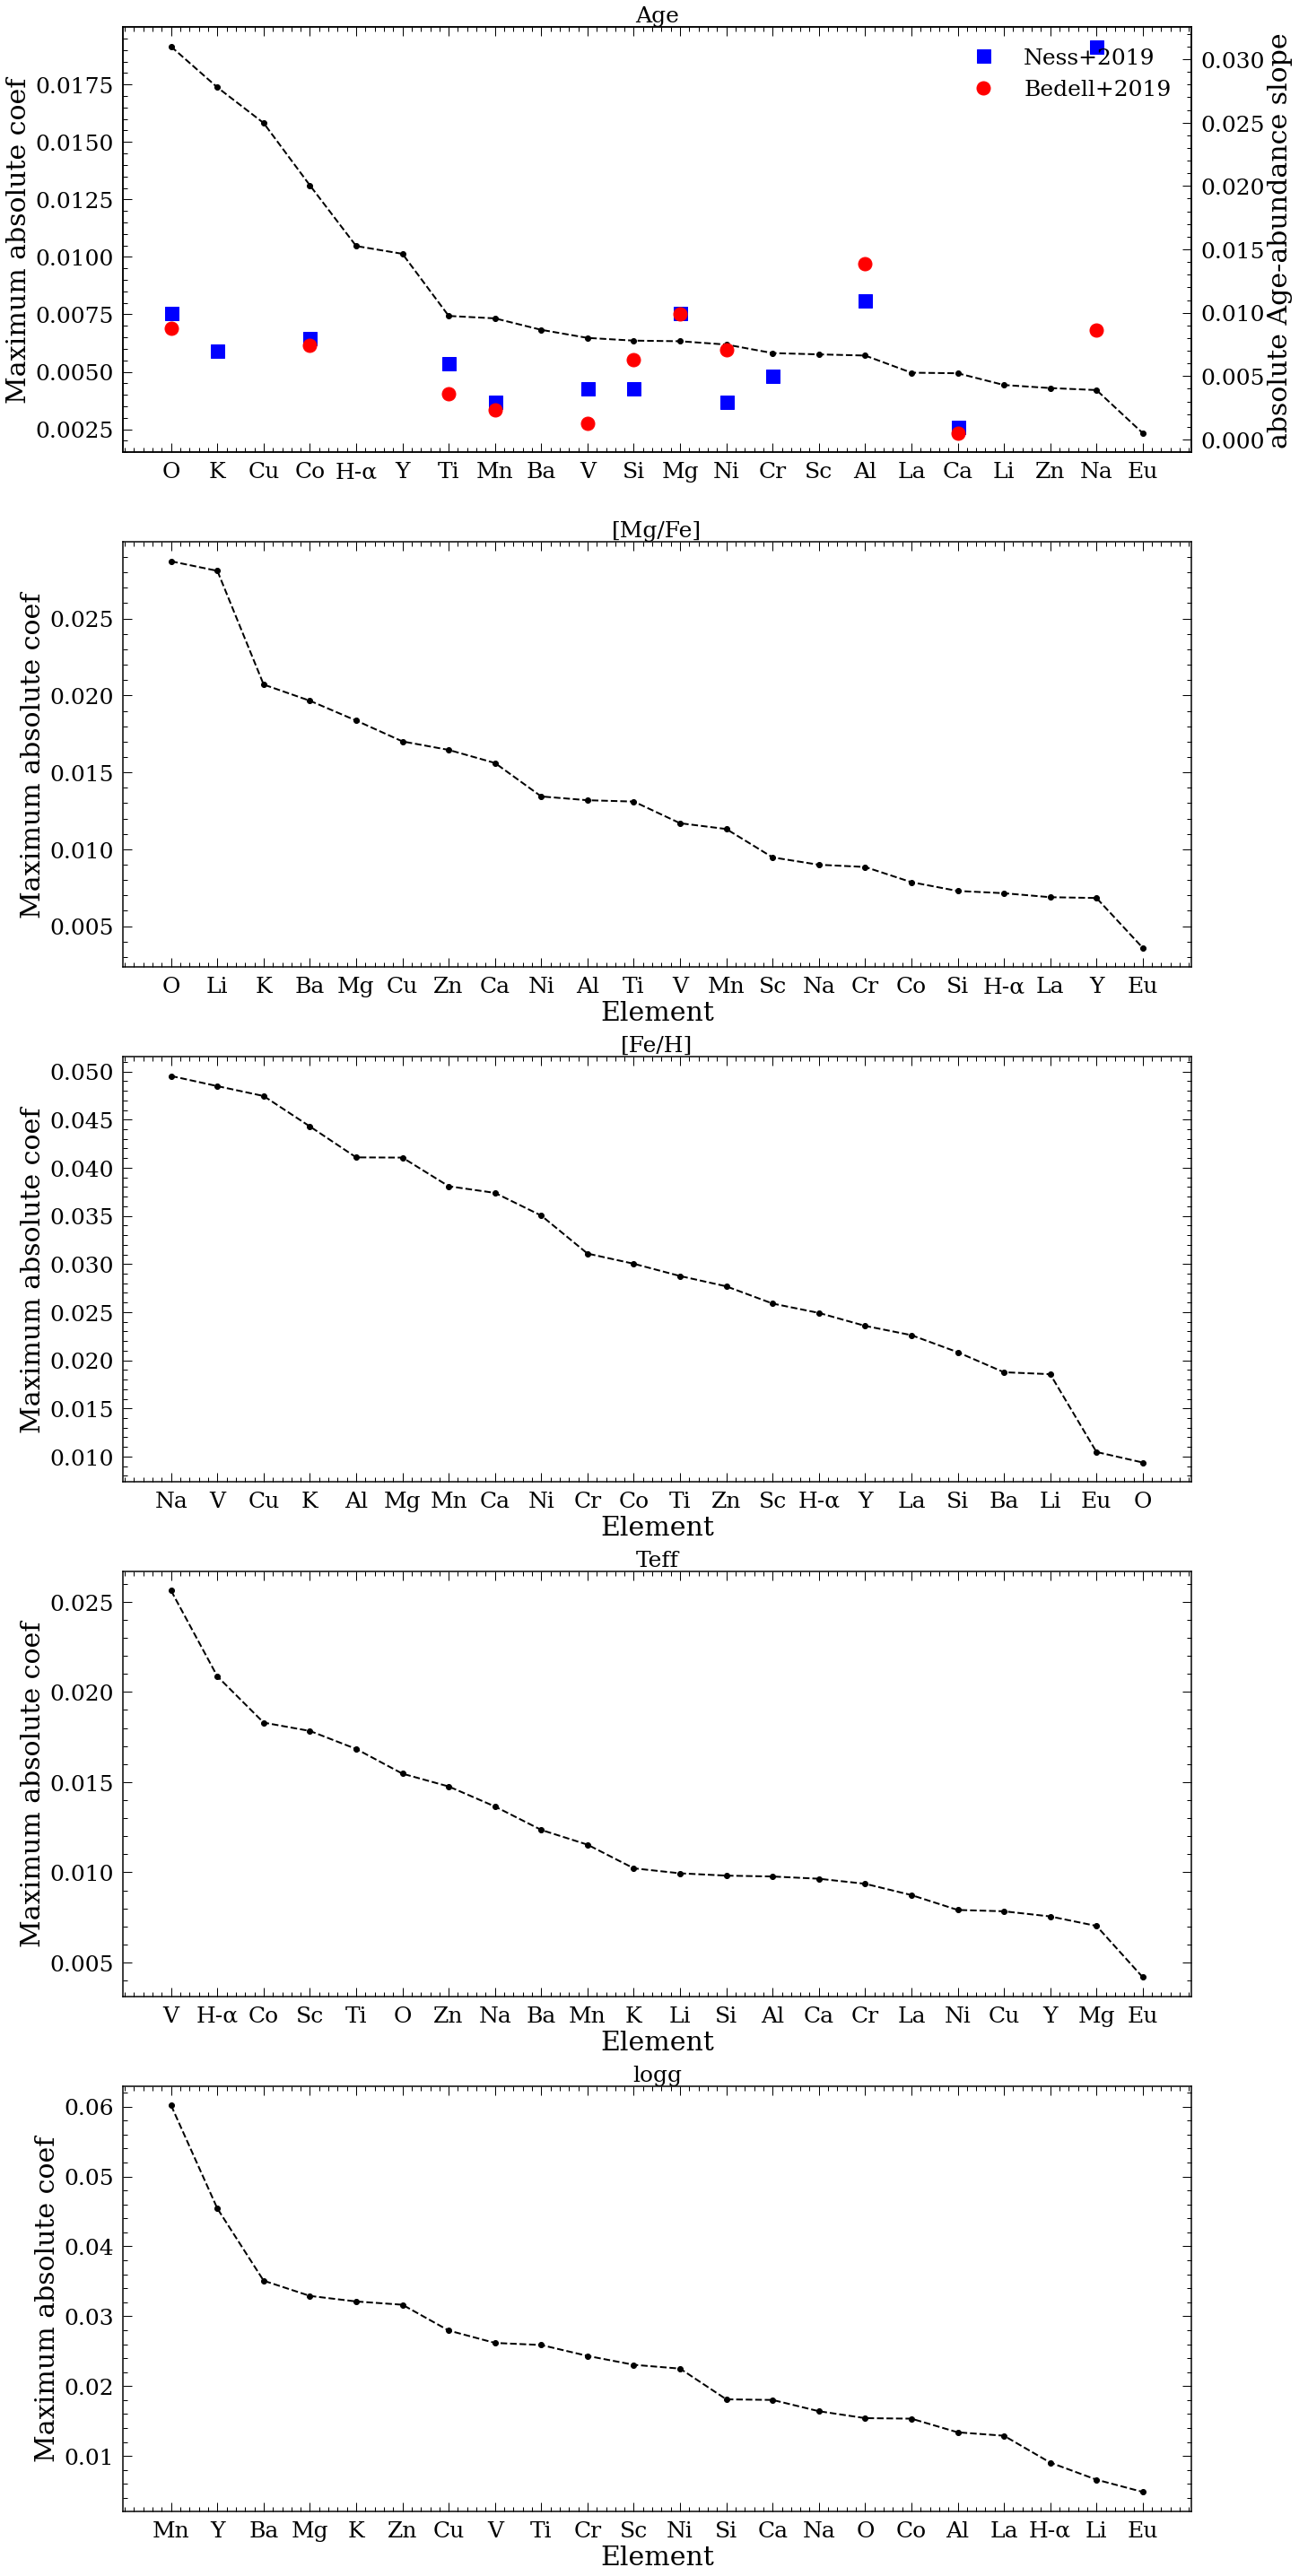

In [113]:


plt.figure(figsize=(20,40))
plt.subplot(5,1,1)
summerydata=summerydata.sort_values(by='agecoef',ascending=False)
plt.plot(summerydata['elements'],summerydata['agecoef'],'ko--',label='Age')
plt.ylabel('Maximum absolute coef')
plt.twinx()
plt.plot(summerydata['elements'],abs(summerydata['Ness2019']),'bs',label='Ness+2019',markersize=15)
plt.plot(summerydata['elements'],abs(summerydata['m']),'ro',label='Bedell+2019',markersize=15)
plt.ylabel('absolute Age-abundance slope')
plt.xlabel('Element')
plt.title('Age',fontsize=25)
plt.legend(loc=1)

plt.subplot(5,1,2)
summerydata=summerydata.sort_values(by='mgfecoef',ascending=False)
plt.plot(summerydata['elements'],summerydata['mgfecoef'],'ko--',label='[Mg/Fe]')
plt.ylabel('Maximum absolute coef')
plt.xlabel('Element')
plt.title('[Mg/Fe]',fontsize=25)

plt.subplot(5,1,3)
summerydata=summerydata.sort_values(by='fehcoef',ascending=False)
plt.plot(summerydata['elements'],summerydata['fehcoef'],'ko--',label='[Fe/H]')
plt.ylabel('Maximum absolute coef')
plt.xlabel('Element')
plt.title('[Fe/H]',fontsize=25)

plt.subplot(5,1,4)
summerydata=summerydata.sort_values(by='teffcoef',ascending=False)
plt.plot(summerydata['elements'],summerydata['teffcoef'],'ko--',label='Teff')
plt.ylabel('Maximum absolute coef')
plt.xlabel('Element')
plt.title('Teff',fontsize=25)

plt.subplot(5,1,5)
summerydata=summerydata.sort_values(by='loggcoef',ascending=False)
plt.plot(summerydata['elements'],summerydata['loggcoef'],'ko--',label='logg')
plt.ylabel('Maximum absolute coef')
plt.xlabel('Element')
plt.title('logg',fontsize=25)
plt.tight_layout()
plt.savefig('coefs.png')

# Get all GALAH ages

In [114]:
import scipy.optimize as opt
def _infer_labels(model, nlabels, flux, ivar, starting_guess=None):
    coeffs_all = model.coeffs
    scatters = model.scatters
    errs_all = np.zeros(nlabels)
    chisq_all = 0
    scales = model.scales

    if starting_guess is None:
        starting_guess = np.ones(nlabels)

    bad = ivar == 0
    flux[bad] = 1.0
    sigma = np.ones(ivar.shape) * 100.0
    sigma[~bad] = np.sqrt(1.0 / ivar[~bad])

    flux_piv = flux - coeffs_all[:,0] * 1.  # pivot around the leading term
    errbar = np.sqrt(sigma**2 + scatters**2)
    coeffs = np.delete(coeffs_all, 0, axis=1)  # take pivot into account
        
    try:
        labels, covs = opt.curve_fit(_func, coeffs, flux_piv,
                                         p0 = starting_guess,
                                         sigma=errbar, absolute_sigma=True)
    except RuntimeError:
        print("Error - curve_fit failed")
        labels = np.zeros(starting_guess.shape)-9999.
        covs = np.zeros((len(starting_guess),len(starting_guess)))-9999.
    chi2 = (flux_piv-_func(coeffs, *labels))**2 * ivar / (1 + ivar * scatters**2)
    chisq_all = sum(chi2)
    labels_all = model.scales * labels + model.pivots
    errs_all = np.sqrt(covs.diagonal())

    return labels_all, errs_all, chisq_all

def _func(coeffs, *labels):
    """ Takes the dot product of coefficients vec & labels vector 
    
    Parameters
    ----------
    coeffs: numpy ndarray
        the coefficients on each element of the label vector

    *labels: numpy ndarray
        label vector

    Returns
    -------
    dot product of coeffs vec and labels vec
    """
    lvec = _get_lvec(list(labels))
    return np.dot(coeffs, lvec)


def _get_lvec(labels):
    """
    Constructs a label vector for an arbitrary number of labels
    Assumes that our model is quadratic in the labels

    Parameters
    ----------
    labels: numpy ndarray
        pivoted label values for one star

    Returns
    -------
    lvec: numpy ndarray
        label vector
    """
    nlabels = len(labels)
    # specialized to second-order model
    linear_terms = labels 
    quadratic_terms = np.outer(linear_terms, 
                               linear_terms)[np.triu_indices(nlabels)]
    lvec = np.hstack((linear_terms, quadratic_terms))
    return lvec

In [115]:
import glob
files=glob.glob("/Users/yl4331/Desktop/CreateDataTable/Data/galahages/dr3/spectra/hermes/*.fits")

In [116]:
sobid=[i[-21:-6] for i in files]
sobid=pd.Series(sobid).drop_duplicates().values
print(len(sobid))

74825


In [133]:
fluxs=np.zeros((4096,4))
ivars=np.zeros((4096,4))

allwl=np.zeros(4096*4)
for i in range(4):
    allwl[4096*i:4096*(i+1)]=wl[:,i]

f = open("galahages_test", "w")
f.write('sobid,feh,feh_err,teff,teff_err,logg,logg_err,mg_fe,mg_fe_err,Dp,Dp_err,Dnu,Dnu_err,age,age_err,chisq,SNR\n')
    
for i in trange(len(sobid)):
    spname='/Users/yl4331/Desktop/CreateDataTable/Data/galahages/dr3/spectra/hermes/'
    count=0
    
    wstr=sobid[i]+','
    # see if I have complete data
    for j in range(4):
        # read in spectra
        newspname=spname+sobid[i]+str(j+1)+'.fits'
        
        # get what the old wl is
        try:
            data=fits.open(newspname)[4]
            try:
                wl_old=np.linspace(data.header['CRVAL1'],data.header['CDELT1']*len(data.data)+data.header['CRVAL1'],len(data.data))
                
                # get old flux/ivar
                flux=fits.open(newspname)[0].data # load in unnormalized flux
                ivar=fits.open(newspname)[1].data*flux # load in ivar
            
                __, new_flux = interpolate_to_grid(wl_old, flux, wl[:,j]) # on common grid
                __, new_ivar = interpolate_to_grid(wl_old, ivar, wl[:,j]) # on common grid
                count=count+1
            except:
                continue
        except:
            continue
            
        
    
    fluxall=np.zeros(4096*4)
    ivarsall=np.zeros(4096*4)
    if count==4:
        for j in range(4):
            newspname=spname+sobid[i]+str(j+1)+'.fits'
            data=fits.open(newspname)[4]
            start_wavelength = data.header["CRVAL1"]
            dispersion       = data.header["CDELT1"]
            nr_pixels        = data.header["NAXIS1"]
            reference_pixel  = data.header["CRPIX1"]
            if reference_pixel == 0:
                reference_pixel = 1
            wl_old=((np.arange(0,nr_pixels)--reference_pixel+1)*dispersion+start_wavelength)
        
            # get old flux/ivar
            flux=fits.open(newspname)[0].data # load in unnormalized flux
            ivar=fits.open(newspname)[1].data*flux # load in ivar
            try: 
                __, new_flux = interpolate_to_grid(wl_old, flux, wl[:,j]) # on common grid
                __, new_ivar = interpolate_to_grid(wl_old, ivar, wl[:,j]) # on common grid
            
                normflux=scipy.ndimage.gaussian_filter1d(new_flux, 300)
                flux_norm = new_flux/normflux # normalize flux
                ivar_norm = 1./(new_ivar/normflux)**2 # normalize ivar
                flux_norm,ivar_norm=replace_emptyflux(flux_norm,ivar_norm)
                fluxall[4096*j:4096*(j+1)],ivarsall[4096*j:4096*(j+1)]=flux_norm,ivar_norm
            except:
                for k in range(11):
                    wstr=wstr+str(-9999)+','
                wstr=wstr+str(-9999)+'\n'
                f.write(wstr)  
                break
                
        
        labels_all, errs_all, chisq_all=_infer_labels(md, 7, fluxall, ivarsall)
        SNR_sing=calc_SNR(fluxall, ivarsall)
        
        for k in range(len(labels_all)):
            wstr=wstr+str(labels_all[k])+','+str(errs_all[k])+','
        wstr=wstr+str(chisq_all)+','+str(SNR_sing)+'\n'
        f.write(wstr)   
            
                
    else:
        for k in range(11):
            wstr=wstr+str(-9999)+','
        wstr=wstr+str(-9999)+'\n'
        f.write(wstr)      
        

  8%|▊         | 6108/74825 [11:15<3:05:18,  6.18it/s]<ipython-input-114-5fc6cb1b8a23>:32: RuntimeWarning: invalid value encountered in sqrt
  errs_all = np.sqrt(covs.diagonal())
  8%|▊         | 6110/74825 [11:16<4:26:04,  4.30it/s]

Error - curve_fit failed


 24%|██▎       | 17766/74825 [33:23<3:01:22,  5.24it/s]

Error - curve_fit failed


 41%|████▏     | 30914/74825 [1:01:03<2:43:52,  4.47it/s]

Error - curve_fit failed


 47%|████▋     | 35211/74825 [1:10:27<1:57:17,  5.63it/s]

Error - curve_fit failed


 54%|█████▍    | 40674/74825 [1:22:28<2:57:27,  3.21it/s]

Error - curve_fit failed


 55%|█████▌    | 41487/74825 [1:25:03<2:30:54,  3.68it/s]

Error - curve_fit failed


 58%|█████▊    | 43316/74825 [1:30:18<2:03:37,  4.25it/s]

Error - curve_fit failed


 65%|██████▌   | 48713/74825 [1:46:25<2:05:36,  3.46it/s]

Error - curve_fit failed


 65%|██████▌   | 48791/74825 [1:46:40<1:52:48,  3.85it/s]

Error - curve_fit failed


 79%|███████▊  | 58842/74825 [2:23:48<2:43:20,  1.63it/s]

Error - curve_fit failed


 90%|████████▉ | 67049/74825 [2:55:26<34:59,  3.70it/s]  

Error - curve_fit failed


100%|██████████| 74825/74825 [3:18:11<00:00,  6.29it/s]


In [134]:
allages_org=pd.read_table('galahages_test',delimiter=',')
print(np.shape(allages_org))
allages=pd.read_table('galahages',delimiter=',')
allages=allages.drop_duplicates('sobid',keep='first').reset_index(drop=True)
print(np.shape(allages))
allages_org=pd.merge(allages_org,allages,left_on='sobid',right_on='sobid',how='inner')
print(np.shape(allages_org))


(74812, 17)
(74825, 17)
(74806, 33)


/opt/homebrew/anaconda3/lib/python3.8/site-packages/pandas/core/reshape/merge.py:1113: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation
  warnings.warn(


In [3]:
allages_org=pd.read_table('cannonages/galahages_test',delimiter=',')
#allages_org=allages_org.loc[allages_org['feh']>-100]
#allages_org=allages_org.loc[abs(allages_org['age'])<25]
#allages_org=allages_org.loc[allages_org['teff']>-100]
print(np.shape(allages_org))

(74812, 17)


In [137]:
print('before',np.shape(allages_org))
allages_org=allages_org.loc[allages_org['SNR']>20]
print('SNR',np.shape(allages_org))
allages_org=allages_org.loc[abs(allages_org['logg']-2.625)<0.375]
print('logg',np.shape(allages_org))
allages_org=allages_org.loc[abs(allages_org['teff']-4725)<125]
print('teff',np.shape(allages_org))
allages_org=allages_org.loc[abs(allages_org['feh']+0.0625)<0.4375]
print('feh',np.shape(allages_org))
allages_org=allages_org.loc[abs(allages_org['mg_fe']-0.15)<0.25]
print('mg_fe',np.shape(allages_org))
allages_org=allages_org.loc[abs(allages_org['age']-10)<10]
print('age',np.shape(allages_org))
allages_org=allages_org.reset_index(drop=True)



before (74812, 17)
SNR (64362, 17)
logg (57770, 17)
teff (50830, 17)
feh (50123, 17)
mg_fe (49406, 17)
age (48953, 17)


In [138]:
#allages_org=allages_org.loc[allages_org.SNR>40]
allages_org=allages_org.loc[allages_org.chisq/16384<2]
np.shape(allages_org)

(46472, 17)

<AxesSubplot:>

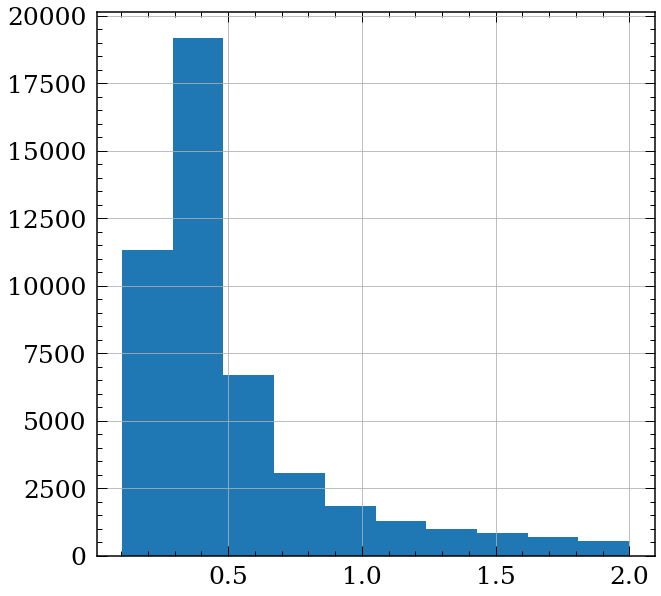

In [139]:
(allages_org['chisq']/16384).hist()


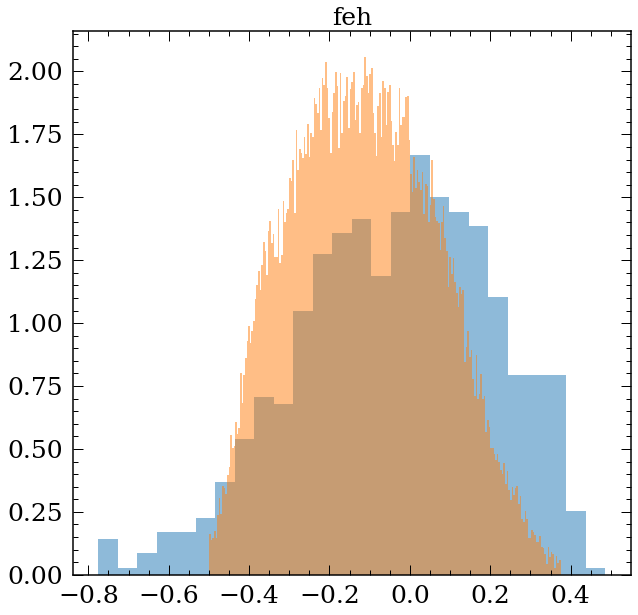

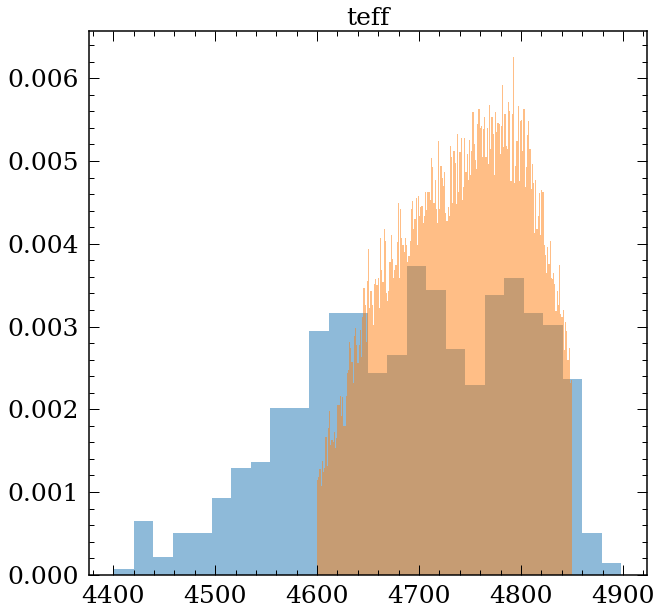

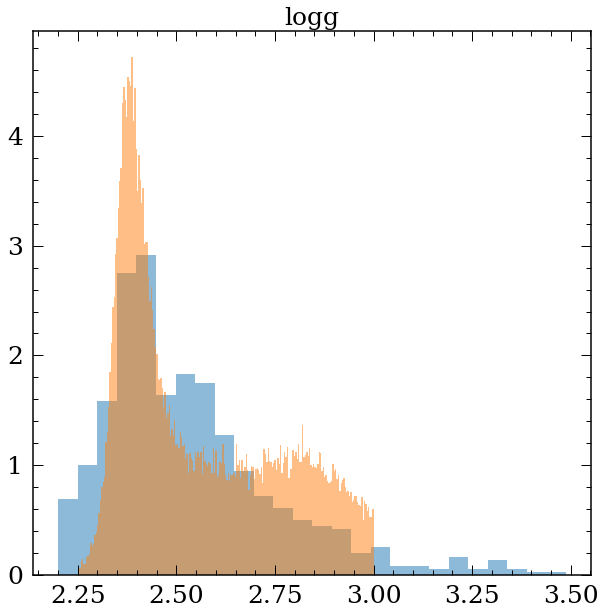

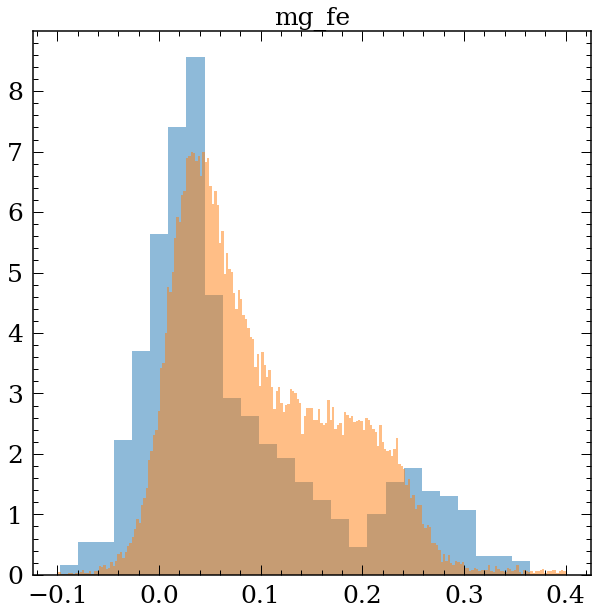

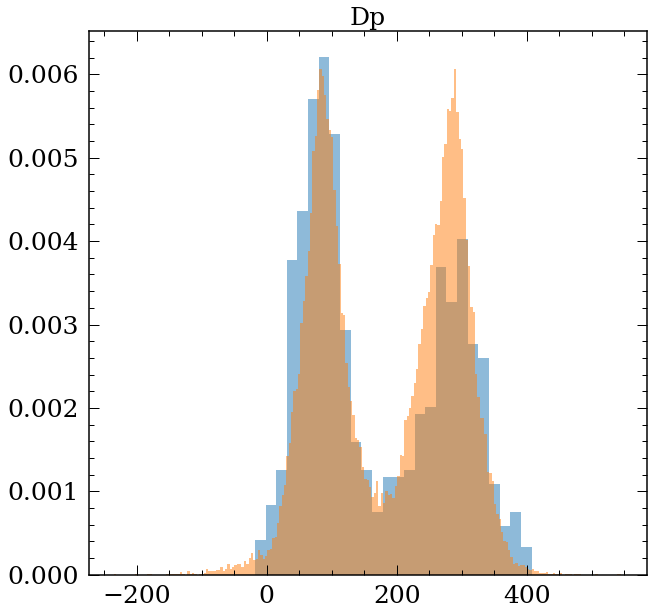

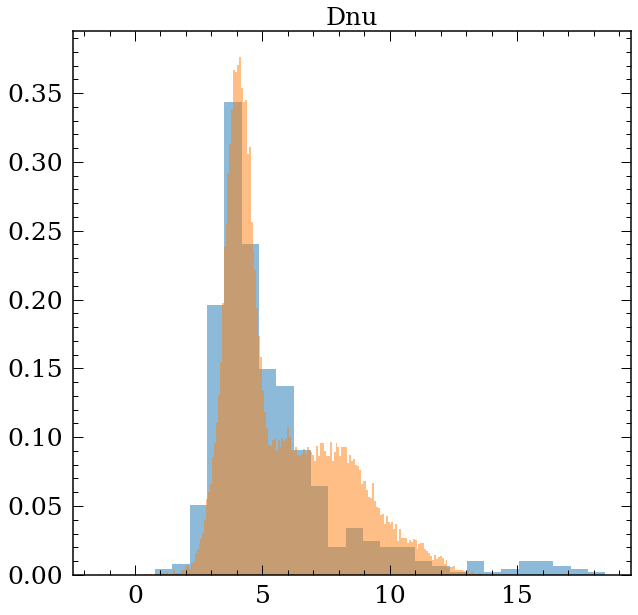

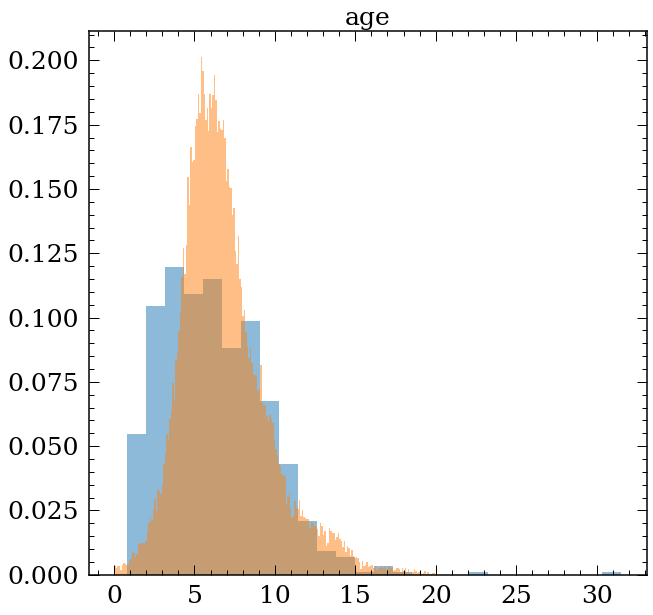

In [140]:
labelnames=['feh','teff','logg','mg_fe','Dp','Dnu','age']
testlabels=allages_org[['feh','teff','logg','mg_fe','Dp','Dnu','age']].values
for i in range(7):
    plt.figure()
    plt.hist(ds.tr_label[:,i],bins=int(np.sqrt(len(ds.tr_label[:,i]))),alpha=0.5,density=True)
    plt.hist(testlabels[:,i],bins=int(np.sqrt(len(testlabels[:,i]))),alpha=0.5,density=True)
    plt.title(labelnames[i],fontsize=25)

In [141]:
## compare with GALAH 
allgalah=pd.read_pickle('Data/galah_dr3_gaia_cm.pkl')
print(np.shape(allgalah))

allgalah[['fe_h_org','logg_org','Mg_fe_org','teff_org']]=allgalah[['fe_h','logg','Mg_fe','teff']]
print('before merging',np.shape(allages_org))
allages_org=pd.merge(allages_org,allgalah[['fe_h_org','logg_org','Mg_fe_org','teff_org','sobject_id']],
                     left_on='sobid',right_on='sobject_id',how='inner')
print('after merging',np.shape(allages_org))

(577362, 264)
before merging (46472, 17)
after merging (46472, 22)


(2.0, 5.0)

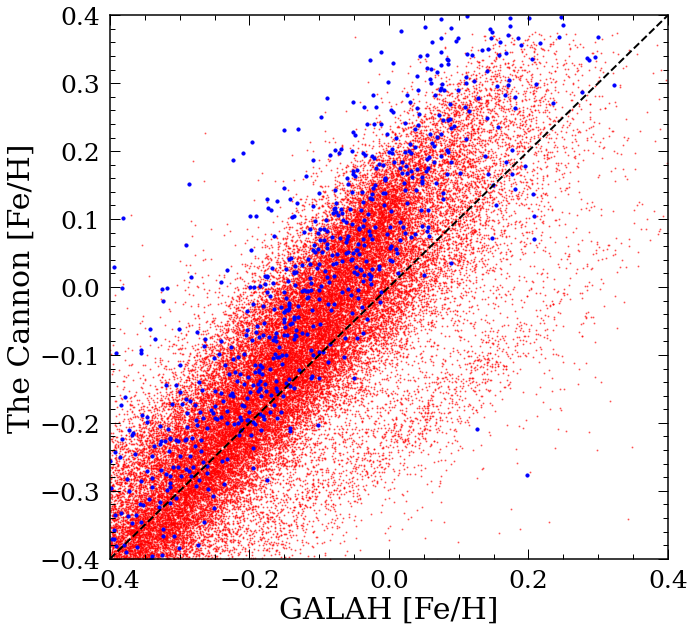

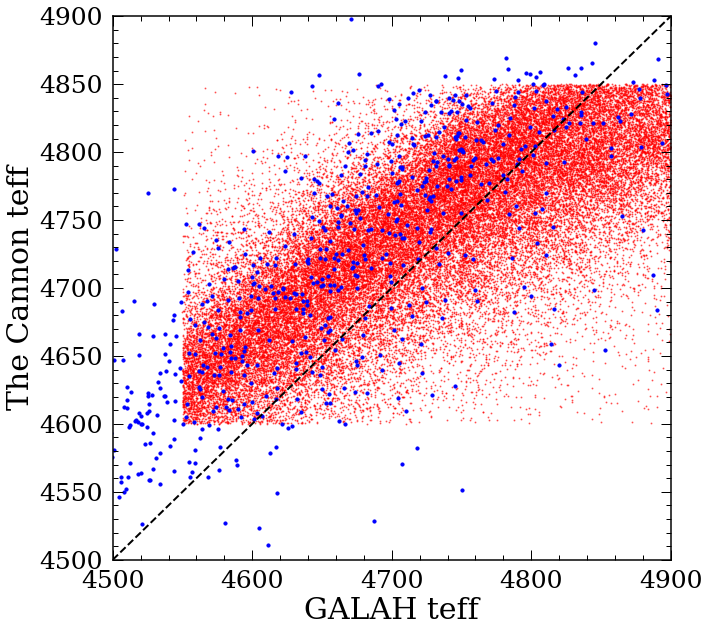

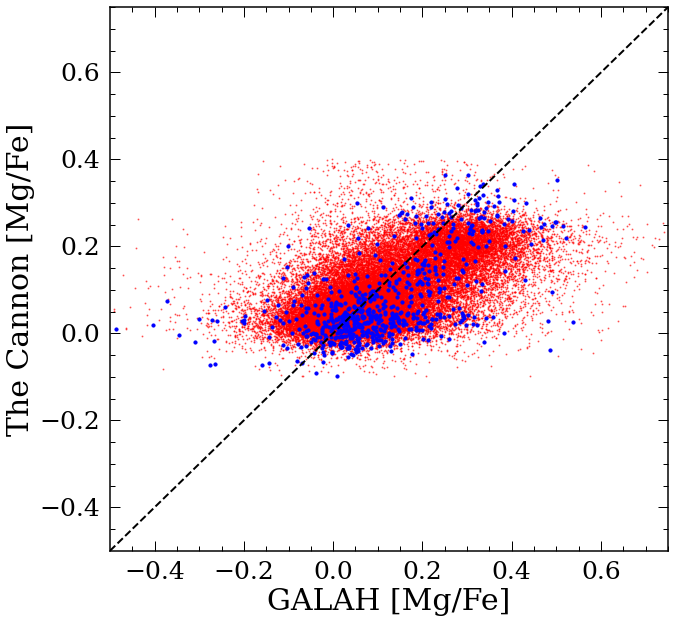

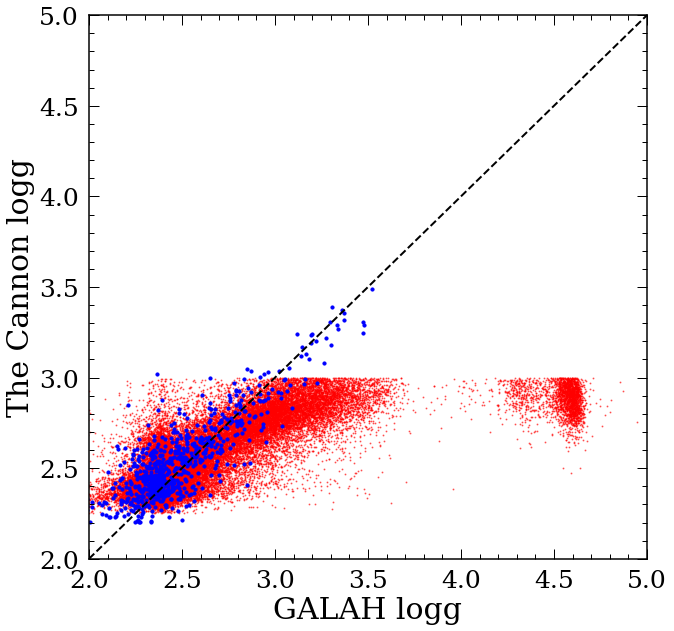

In [142]:
# compare with original training set


plt.figure()
plt.scatter(allages_org['fe_h_org'],allages_org['feh'],c='r',s=1,alpha=0.5)
plt.scatter(galah_apogee['fe_h'],galah_apogee['M_H'],c='b',s=10)
plt.xlabel('GALAH [Fe/H]')
plt.ylabel('The Cannon [Fe/H]')
plt.plot([-0.4,0.4],[-0.4,0.4],'k--')
plt.xlim([-0.4,0.4])
plt.ylim([-0.4,0.4])

plt.figure()
plt.scatter(allages_org['teff_org'],allages_org['teff'],c='r',s=1,alpha=0.5)
plt.scatter(galah_apogee['teff'],galah_apogee['TEFF'],c='b',s=10)
plt.xlabel('GALAH teff')
plt.ylabel('The Cannon teff')
plt.plot([4500,4900],[4500,4900],'k--')
plt.xlim([4500,4900])
plt.ylim([4500,4900])

plt.figure()
plt.scatter(allages_org['Mg_fe_org'],allages_org['mg_fe'],c='r',s=1,alpha=0.5)
plt.scatter(galah_apogee['Mg_fe'],galah_apogee['MG_FE'],c='b',s=10)
plt.xlabel('GALAH [Mg/Fe]')
plt.ylabel('The Cannon [Mg/Fe]')
plt.plot([-0.5,0.75],[-0.5,0.75],'k--')
plt.xlim([-0.5,0.75])
plt.ylim([-0.5,0.75])

plt.figure()
plt.scatter(allages_org['logg_org'],allages_org['logg'],c='r',s=1,alpha=0.5)
plt.scatter(galah_apogee['logg'],galah_apogee['LOGG'],c='b',s=10)
plt.xlabel('GALAH logg')
plt.ylabel('The Cannon logg')
plt.plot([2,5],[2,5],'k--')
plt.xlim([2,5])
plt.ylim([2,5])





(2.0, 5.0)

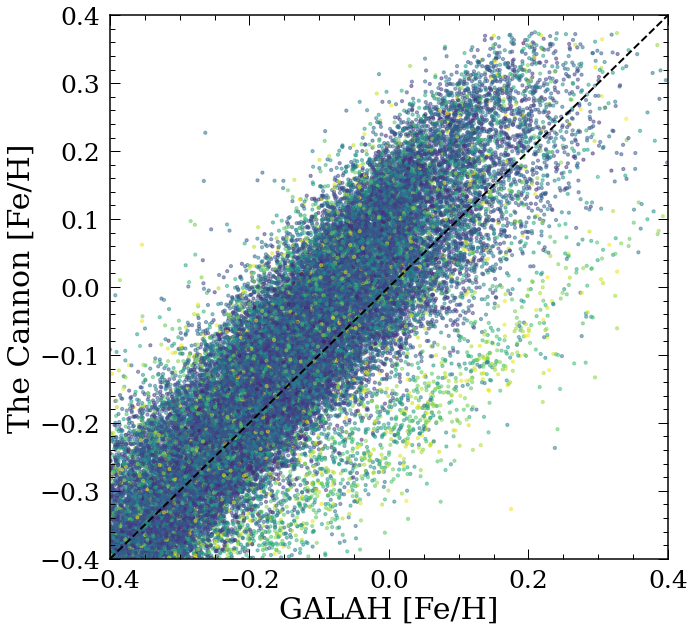

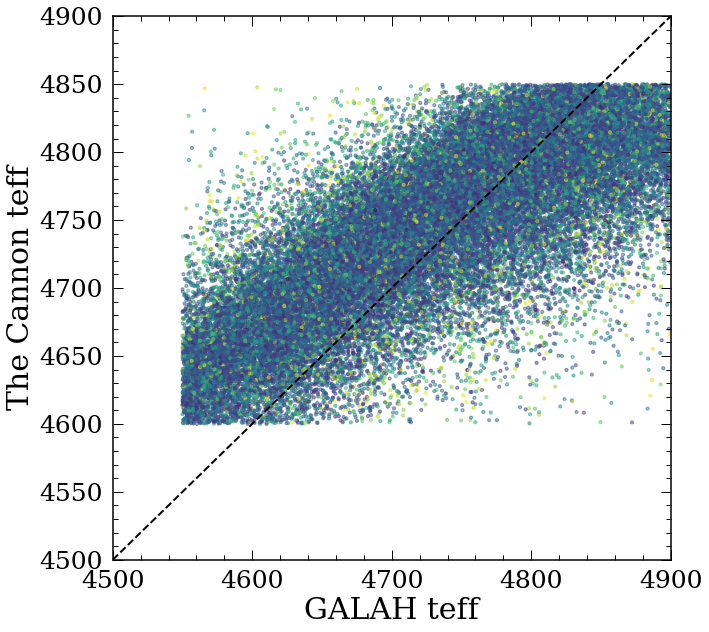

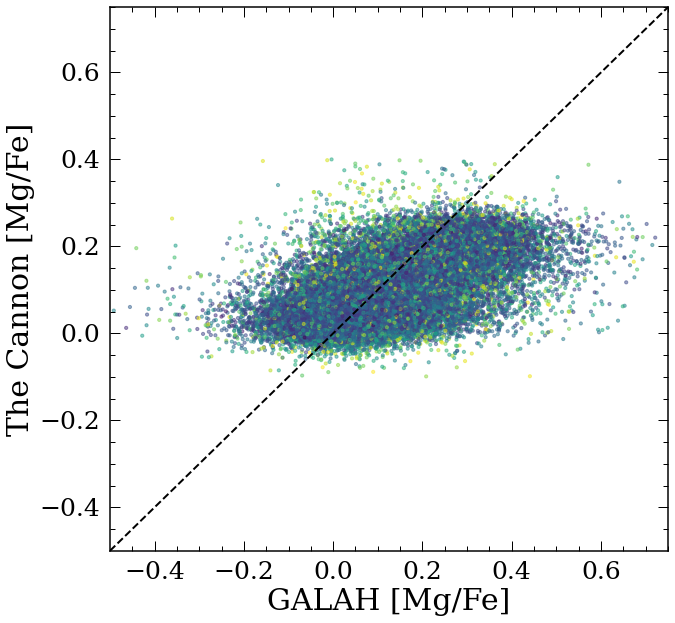

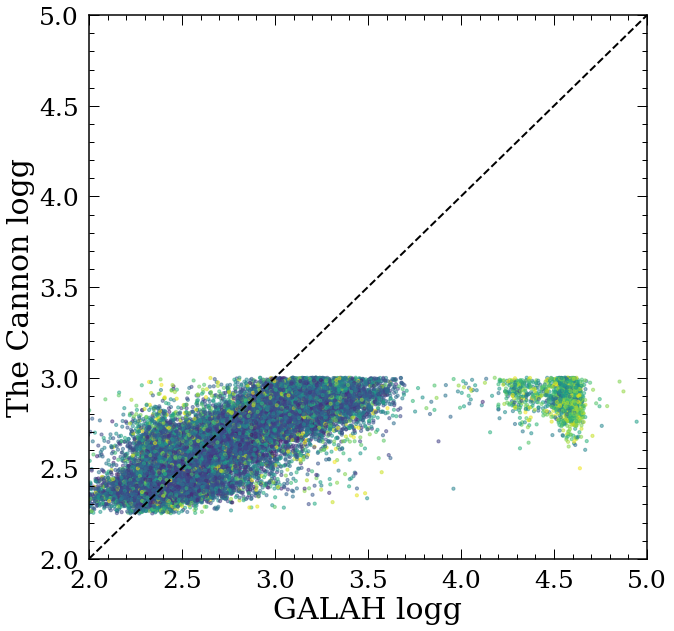

In [143]:
# see if any cuts and make result better... 
checkstat='chisq'
m=allages_org[checkstat]/16384<1
mks=10

plt.figure()
plt.scatter(allages_org['fe_h_org'][m],allages_org['feh'][m],c=allages_org[checkstat][m],s=mks,alpha=0.5)
plt.xlabel('GALAH [Fe/H]')
plt.ylabel('The Cannon [Fe/H]')
plt.plot([-0.4,0.4],[-0.4,0.4],'k--')
plt.xlim([-0.4,0.4])
plt.ylim([-0.4,0.4])

plt.figure()
plt.scatter(allages_org['teff_org'][m],allages_org['teff'][m],c=allages_org[checkstat][m],s=mks,alpha=0.5)
plt.xlabel('GALAH teff')
plt.ylabel('The Cannon teff')
plt.plot([4500,4900],[4500,4900],'k--')
plt.xlim([4500,4900])
plt.ylim([4500,4900])

plt.figure()
plt.scatter(allages_org['Mg_fe_org'][m],allages_org['mg_fe'][m],c=allages_org[checkstat][m],s=mks,alpha=0.5)
plt.xlabel('GALAH [Mg/Fe]')
plt.ylabel('The Cannon [Mg/Fe]')
plt.plot([-0.5,0.75],[-0.5,0.75],'k--')
plt.xlim([-0.5,0.75])
plt.ylim([-0.5,0.75])

plt.figure()
plt.scatter(allages_org['logg_org'][m],allages_org['logg'][m],c=allages_org[checkstat][m],s=mks,alpha=0.5)
plt.xlabel('GALAH logg')
plt.ylabel('The Cannon logg')
plt.plot([2,5],[2,5],'k--')
plt.xlim([2,5])
plt.ylim([2,5])



(-0.2, 0.5)

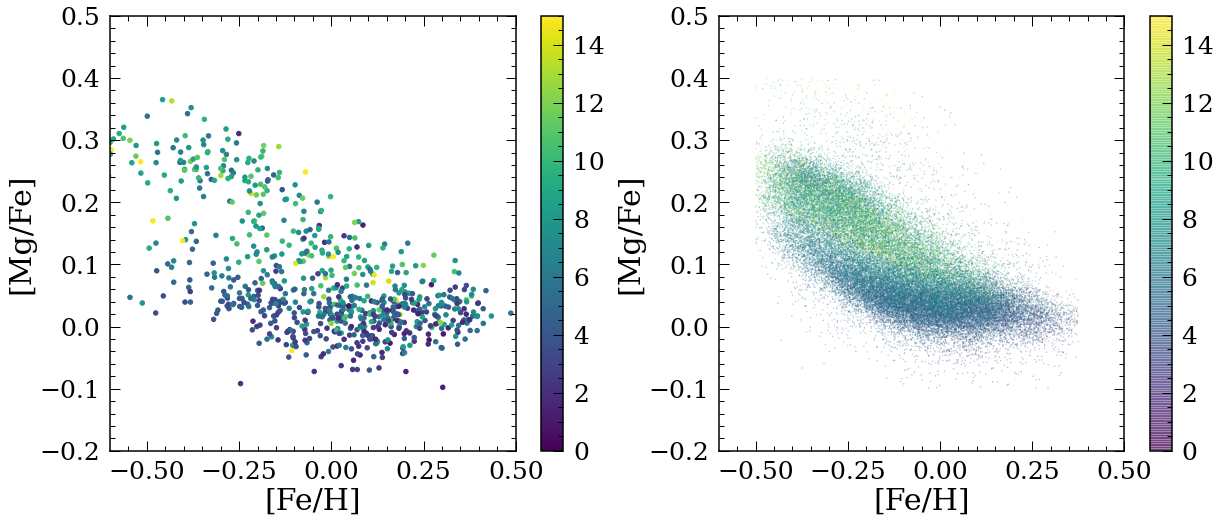

In [147]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
reference_labels = ds.tr_label
plt.scatter(reference_labels[:,0],reference_labels[:,3],c=reference_labels[:,-1],s=20,vmin=0,vmax=15)
plt.xlabel('[Fe/H]')
plt.ylabel('[Mg/Fe]')
plt.colorbar()
plt.xlim([-0.6,0.5])
plt.ylim([-0.2,0.5])

plt.subplot(1,2,2)
allages_org_plot=allages_org.loc[allages_org['age']<1000]
plt.scatter(allages_org_plot['feh'],allages_org_plot['mg_fe'],c=allages_org_plot['age'],s=0.1,vmin=0,vmax=15,
           alpha=0.5)
plt.xlabel('[Fe/H]')
plt.ylabel('[Mg/Fe]')
plt.colorbar()
plt.xlim([-0.6,0.5])
plt.ylim([-0.2,0.5])


(-10.0, 450.0)

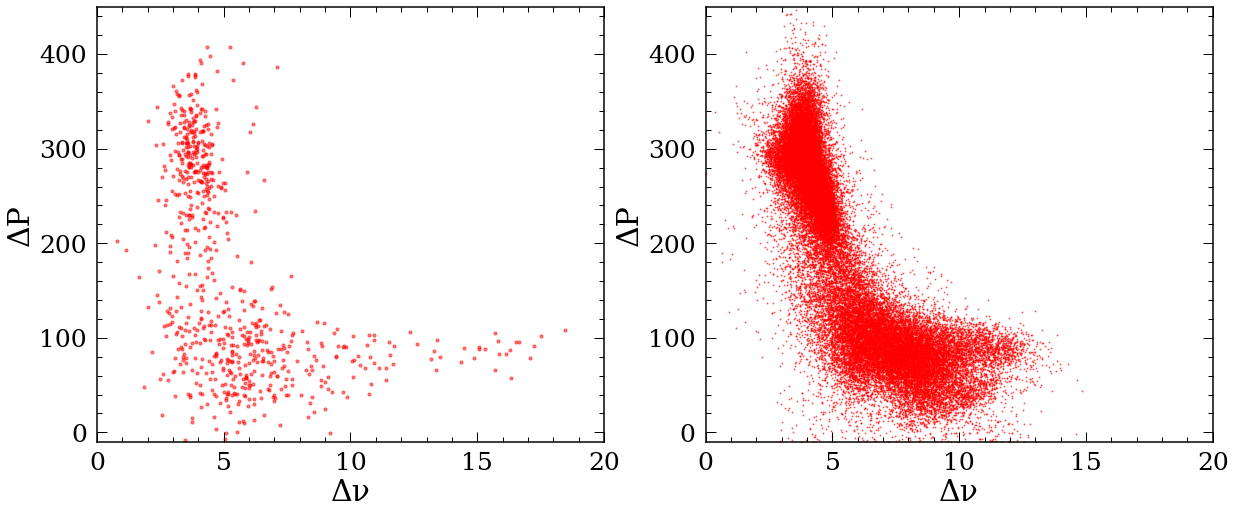

In [145]:
plt.rcParams.update({
    "text.usetex": False
})

plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
reference_labels = ds.tr_label
plt.scatter(reference_labels[:,-2],reference_labels[:,-3],c='r',s=10,alpha=0.5)
plt.xlabel('Δν')
plt.ylabel('ΔP')
plt.xlim([0,20])
plt.ylim([-10,450])

plt.subplot(1,2,2)
allages_org_plot=allages_org.loc[allages_org['age']<1000]
plt.scatter(allages_org_plot['Dnu'],allages_org_plot['Dp'],c='r',s=1,alpha=0.5)
plt.xlabel('Δν')
plt.ylabel('ΔP')
plt.xlim([0,20])
plt.ylim([-10,450])

